Interpolation homework.

In [648]:
import numpy as np

In [649]:
import scipy

In [650]:
from scipy import interpolate

In [651]:
from scipy.special import chebyt

In [652]:
from scipy.interpolate import CubicSpline, interp1d

In [653]:
from numpy.polynomial import Chebyshev as T

In [654]:
from numpy.polynomial.chebyshev import chebval, chebfit

In [655]:
import matplotlib.pyplot as plt

In [7]:
#Firstly, let us define the utility functions we will work with.

In [7]:
def f(c):
    return np.log(c)

In [8]:
def g(c):
    return np.sqrt(c)

In [9]:
def h(c,a):
    return (c ** (1-a))/(1-a)

In [11]:
#Next, create the grid.

In [207]:
n=11

In [208]:
grid=np.linspace(0.1,5,n)

In [38]:
#Finally, create a list of values of a for the function h.

In [209]:
a_values=[2,5,10]

In [210]:
f(grid)
print(f(grid))

[-2.30258509 -0.52763274  0.07696104  0.45107562  0.72270598  0.93609336
  1.11185752  1.26129787  1.3912819   1.50629715  1.60943791]


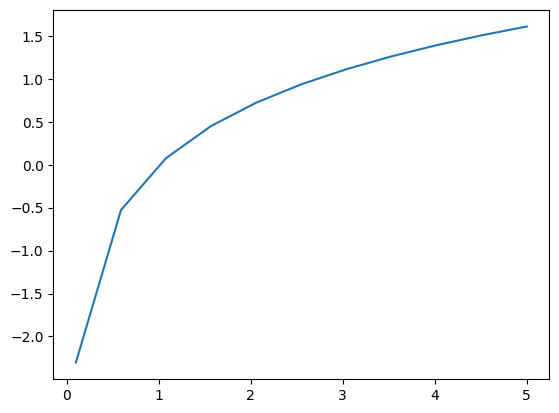

In [211]:
plt.plot(grid, f(grid))
plt.show()

In [212]:
g(grid)
print(g(grid))

[0.31622777 0.76811457 1.03923048 1.25299641 1.43527001 1.59687194
 1.74355958 1.87882942 2.00499377 2.12367606 2.23606798]


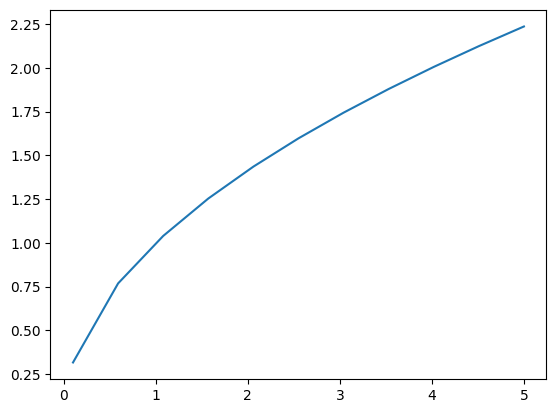

In [213]:
plt.plot(grid, g(grid))
plt.show()

In [214]:
for a in a_values:
    h(grid,a)
    print(h(grid,a))

[-10.          -1.69491525  -0.92592593  -0.63694268  -0.48543689
  -0.39215686  -0.32894737  -0.28328612  -0.24875622  -0.22172949
  -0.2       ]
[-2.50000000e+03 -2.06315550e+00 -1.83757463e-01 -4.11473053e-02
 -1.38826101e-02 -5.91261073e-03 -2.92715469e-03 -1.61005676e-03
 -9.57272970e-04 -6.04273907e-04 -4.00000000e-04]
[-1.11111111e+08 -1.28259454e+01 -5.55832186e-02 -1.91716998e-03
 -1.66323076e-04 -2.43722636e-05 -5.01066350e-06 -1.30552485e-06
 -4.05249990e-07 -1.43935730e-07 -5.68888889e-08]


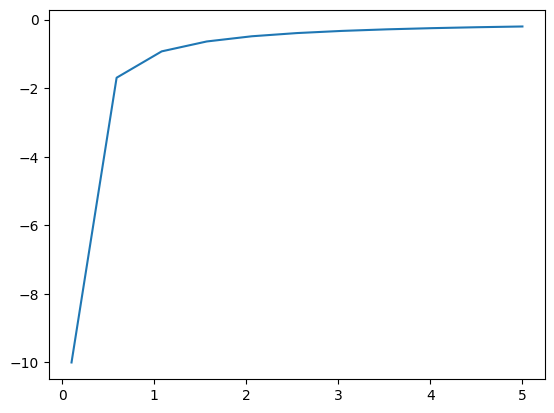

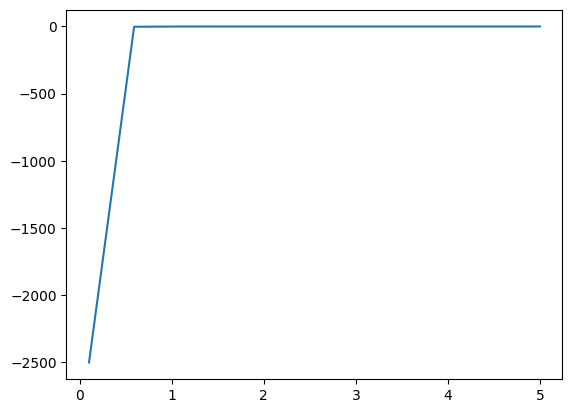

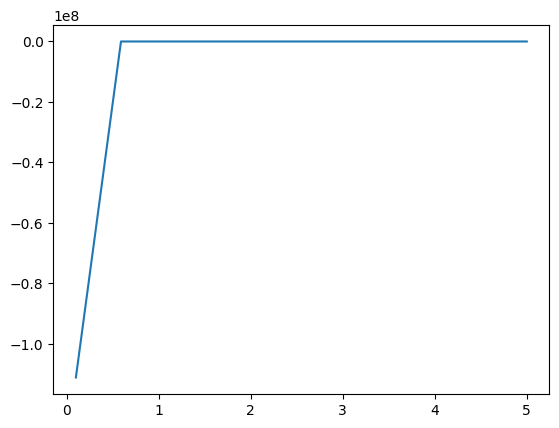

In [215]:
for a in a_values:
    plt.plot(grid, h(grid,a))
    plt.show()

In [216]:
interp_grid=np.linspace(0.1,5,1001)

In [218]:
def interp_f(c):
    return np.interp(interp_grid, grid, f(c))

In [219]:
interp_f(grid)
print(interp_f(grid))

[-2.30258509 -2.28483557 -2.26708605 ...  1.6073751   1.6084065
  1.60943791]


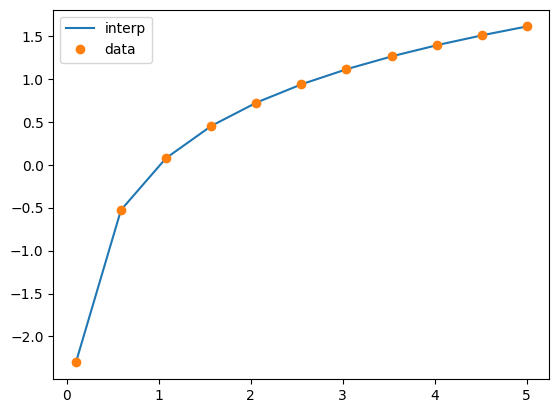

In [220]:
plt.plot(interp_grid, interp_f(grid), label = 'interp')
plt.plot(grid, f(grid),'o' ,label = 'data')
plt.legend()
plt.show()

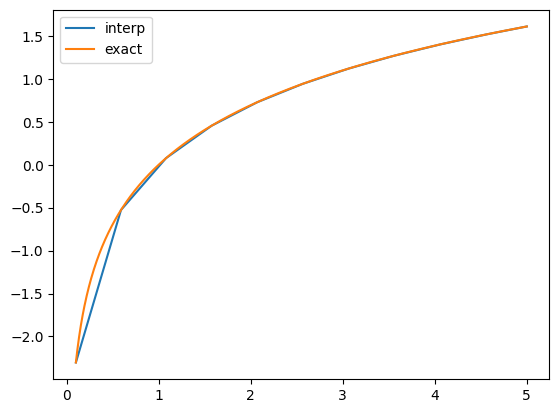

In [221]:
#f(interp_grid)
plt.plot(interp_grid, interp_f(grid), label = 'interp')
plt.plot(interp_grid, f(interp_grid), label = 'exact')
plt.legend()
plt.show()


In [222]:
def interp_g(c):
    return np.interp(interp_grid, grid, g(c))

In [223]:
interp_g(grid)
print(interp_g(grid))
print(g(grid))
#print(np.size(interp_g(grid)))
#print(np.size(g(grid)))

[0.31622777 0.32074663 0.3252655  ... 2.23382014 2.23494406 2.23606798]
[0.31622777 0.76811457 1.03923048 1.25299641 1.43527001 1.59687194
 1.74355958 1.87882942 2.00499377 2.12367606 2.23606798]


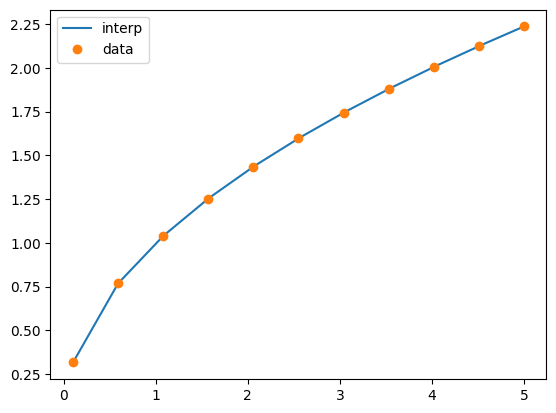

In [224]:
plt.plot(interp_grid, interp_g(grid), label = 'interp')
plt.plot(grid, g(grid),'o' ,label = 'data')
plt.legend()
plt.show()

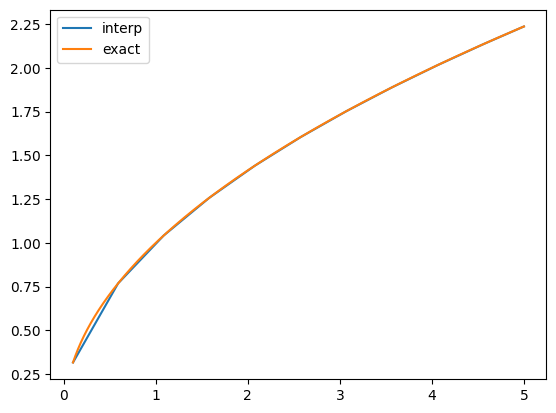

In [225]:
plt.plot(interp_grid, interp_g(grid), label = 'interp')
plt.plot(interp_grid, g(interp_grid), label = 'exact')
plt.legend()
plt.show()

In [226]:
def interp_h(c, a):
    return np.interp(interp_grid, grid, h(c,a))

In [227]:
for a in a_values:
    interp_h(grid,a)
    print(interp_h(grid,a))
    print(np.size(interp_h(grid,a)))
    print(np.size(h(grid,a)))

[-10.          -9.91694915  -9.83389831 ...  -0.20043459  -0.20021729
  -0.2       ]
1001
11
[-2.50000000e+03 -2.47502063e+03 -2.45004126e+03 ... -4.04085478e-04
 -4.02042739e-04 -4.00000000e-04]
1001
11
[-1.11111111e+08 -1.10000000e+08 -1.08888889e+08 ... -5.86298257e-08
 -5.77593573e-08 -5.68888889e-08]
1001
11


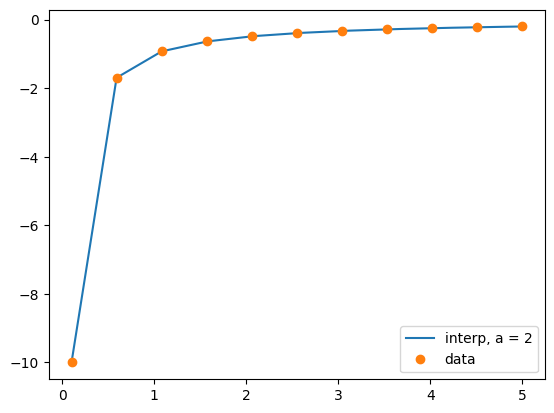

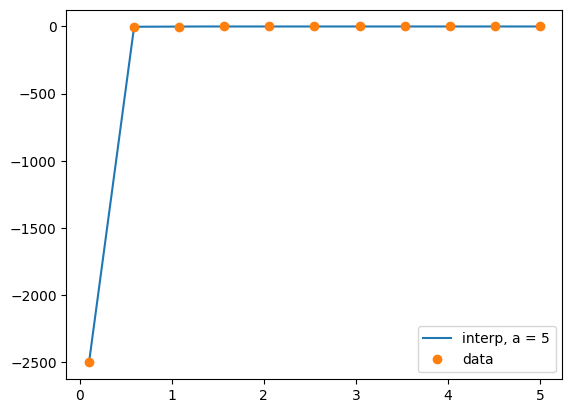

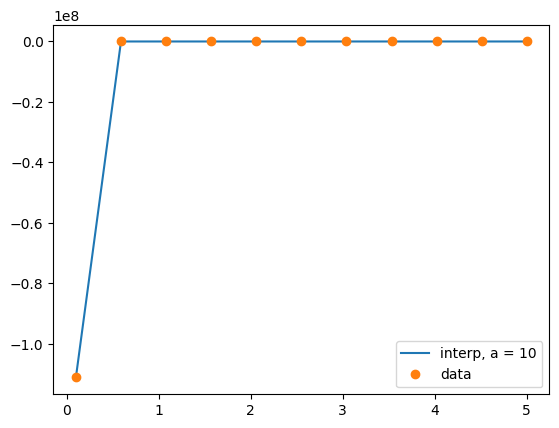

In [228]:
for a in a_values:   
    plt.plot(interp_grid, interp_h(grid, a), label = f'interp, a = {a}')
    plt.plot(grid, h(grid, a),'o' ,label = 'data')
    plt.legend()
    plt.show()

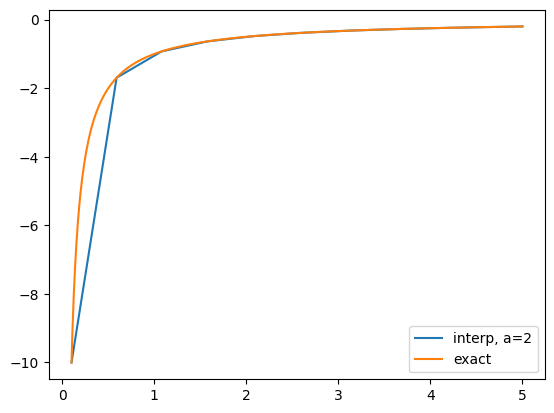

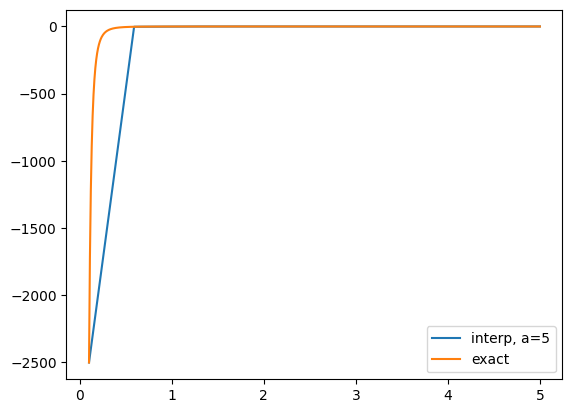

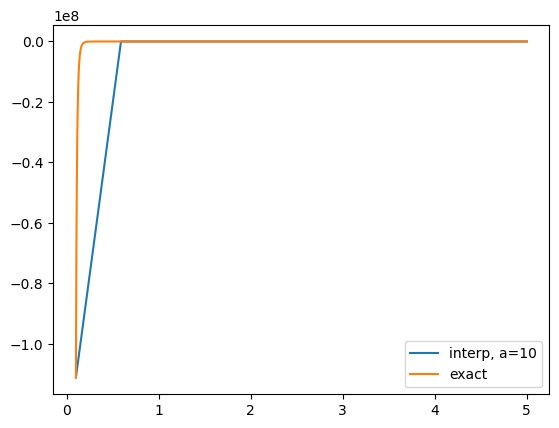

In [229]:
for a in a_values:   
    h(interp_grid, a)
    plt.plot(interp_grid, interp_h(grid, a), label = f'interp, a={a}')
    plt.plot(interp_grid, h(interp_grid, a), label = 'exact')
    plt.legend()
    plt.show()

Create the expanding grids for different values of theta 

In [239]:
new_grid=np.linspace(0, 1, n).reshape(-1,1)

expanding_grid_1=np.zeros(shape=(n,1))

expanding_grid_2=np.zeros(shape=(n,1))

expanding_grid_3=np.zeros(shape=(n,1))

expanding_grid_4=np.zeros(shape=(n,1))

for i in range(len(new_grid)):
    expanding_grid_1[i] =  0.1 + ( 5 - 0.1 ) * (new_grid[i] ** 1)

for i in range(len(new_grid)):
    expanding_grid_2[i] =  0.1 + ( 5 - 0.1 ) * (new_grid[i] ** 1.5)

for i in range(len(new_grid)):
    expanding_grid_3[i] =  0.1 + ( 5 - 0.1 ) * (new_grid[i] ** 3)

for i in range(len(new_grid)):
    expanding_grid_4[i] =  0.1 + ( 5 - 0.1 ) * (new_grid[i] ** 4)

Interpolate for log utility

In [240]:
exp1=np.interp(interp_grid, expanding_grid_1[:,0], f(expanding_grid_1)[:,0])
print(exp1)

[-2.30258509 -2.28483557 -2.26708605 ...  1.6073751   1.6084065
  1.60943791]


In [241]:
exp2=np.interp(interp_grid, expanding_grid_2[:,0], f(expanding_grid_2)[:,0])
print(exp2)

[-2.30258509 -2.27298922 -2.24339335 ...  1.60732248  1.6083802
  1.60943791]


In [242]:
exp3=np.interp(interp_grid, expanding_grid_3[:,0], f(expanding_grid_3)[:,0])
print(exp3)

[-2.30258509 -2.25474776 -2.21433287 ...  1.60715987  1.60829889
  1.60943791]


In [243]:
exp4=np.interp(interp_grid, expanding_grid_4[:,0], f(expanding_grid_4)[:,0])
print(exp4)

[-2.30258509 -2.2553428  -2.21118189 ...  1.6070476   1.60824276
  1.60943791]


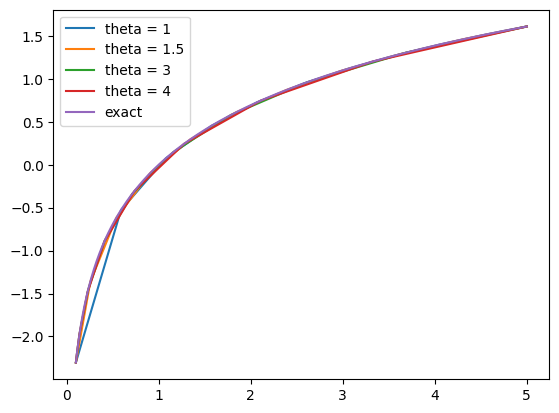

In [244]:
plt.plot(interp_grid, exp1, label = 'theta = 1')
plt.plot(interp_grid, exp2, label = 'theta = 1.5')
plt.plot(interp_grid, exp3, label = 'theta = 3')
plt.plot(interp_grid, exp4, label = 'theta = 4')
plt.plot(interp_grid, f(interp_grid), label = 'exact')
plt.legend()
plt.show()

Now, interpolate for root utility

In [245]:
exp1_g=np.interp(interp_grid, expanding_grid_1[:,0], g(expanding_grid_1)[:,0])
print(exp1_g)

[0.31622777 0.32074663 0.3252655  ... 2.23382014 2.23494406 2.23606798]


In [246]:
exp2_g=np.interp(interp_grid, expanding_grid_2[:,0], g(expanding_grid_2)[:,0])
print(exp2_g)

[0.31622777 0.32219497 0.32816217 ... 2.23379197 2.23492997 2.23606798]


In [247]:
exp3_g=np.interp(interp_grid, expanding_grid_3[:,0], g(expanding_grid_3)[:,0])
print(exp3_g)

[0.31622777 0.32388269 0.33091305 ... 2.23370786 2.23488792 2.23606798]


In [248]:
exp4_g=np.interp(interp_grid, expanding_grid_4[:,0], g(expanding_grid_4)[:,0])
print(exp4_g)

[0.31622777 0.32383464 0.33118147 ... 2.23365225 2.23486011 2.23606798]


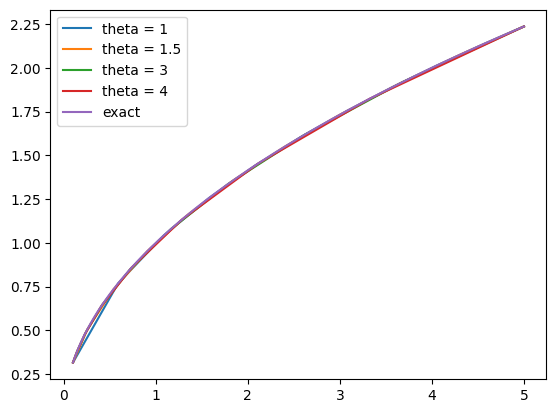

In [249]:
plt.plot(interp_grid, exp1_g, label = 'theta = 1')
plt.plot(interp_grid, exp2_g, label = 'theta = 1.5')
plt.plot(interp_grid, exp3_g, label = 'theta = 3')
plt.plot(interp_grid, exp4_g, label = 'theta = 4')
plt.plot(interp_grid, g(interp_grid), label = 'exact')
plt.legend()
plt.show()

Finally, interpolate for CRRA

results for a = 2


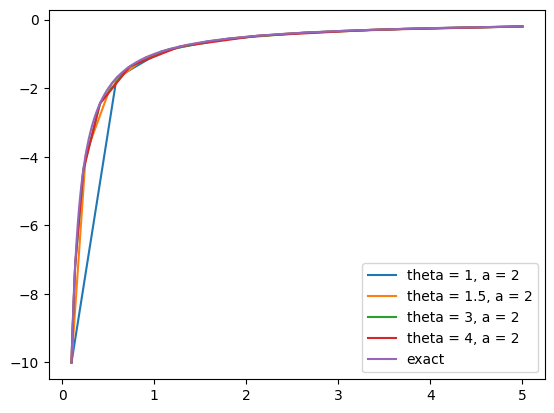

results for a = 5


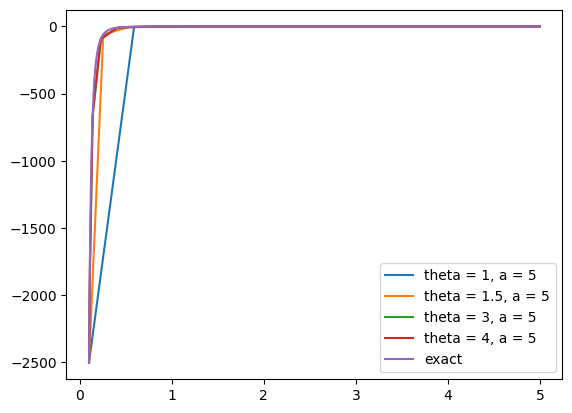

results for a = 10


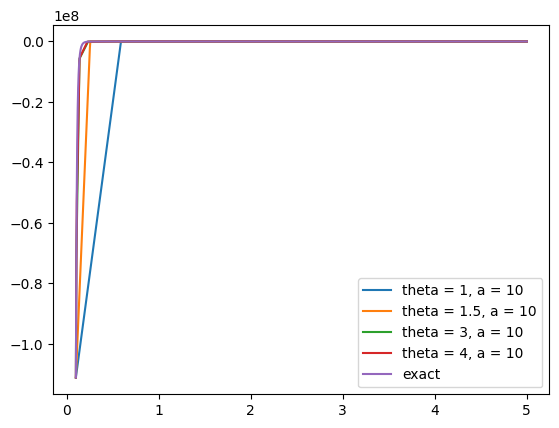

In [250]:
for a in a_values:
    print(f'results for a = {a}')
    exp1_h_a=np.interp(interp_grid, expanding_grid_1[:,0], h(expanding_grid_1, a)[:,0])
    exp2_h_a=np.interp(interp_grid, expanding_grid_2[:,0], h(expanding_grid_2, a)[:,0])
    exp3_h_a=np.interp(interp_grid, expanding_grid_3[:,0], h(expanding_grid_3, a)[:,0])
    exp4_h_a=np.interp(interp_grid, expanding_grid_4[:,0], h(expanding_grid_4, a)[:,0])
    plt.plot(interp_grid, exp1_h_a, label = f'theta = 1, a = {a}')
    plt.plot(interp_grid, exp2_h_a, label = f'theta = 1.5, a = {a}')
    plt.plot(interp_grid, exp3_h_a, label = f'theta = 3, a = {a}')
    plt.plot(interp_grid, exp4_h_a, label = f'theta = 4, a = {a}')
    plt.plot(interp_grid, h(interp_grid, a), label = 'exact')
    plt.legend()
    plt.show()

Now, for cubic splines

First, log utility

In [252]:
def cubic_f_1(c):
    tck = interpolate.splrep(expanding_grid_1, f(c), k=3)
    return interpolate.splev(interp_grid, tck)

In [253]:
def cubic_f_2(c):
    tck = interpolate.splrep(expanding_grid_2, f(c), k=3)
    return interpolate.splev(interp_grid, tck)

In [254]:
def cubic_f_3(c):
    tck = interpolate.splrep(expanding_grid_3, f(c), k=3)
    return interpolate.splev(interp_grid, tck)

In [255]:
def cubic_f_4(c):
    tck = interpolate.splrep(expanding_grid_4, f(c), k=3)
    return interpolate.splev(interp_grid, tck)

In [256]:
cubic_f_1(expanding_grid_1)
print(cubic_f_1(expanding_grid_1))

[-2.30258509 -2.27526029 -2.24816655 ...  1.6074735   1.60845616
  1.60943791]


In [257]:
cubic_f_2(expanding_grid_2)
print(cubic_f_2(expanding_grid_2))

[-2.30258509 -2.2641336  -2.22632932 ...  1.60746642  1.60845258
  1.60943791]


In [258]:
cubic_f_3(expanding_grid_3)
print(cubic_f_3(expanding_grid_3))

[-2.30258509 -2.25474776 -2.20905788 ...  1.60737041  1.60840427
  1.60943791]


In [259]:
cubic_f_4(expanding_grid_4)
print(cubic_f_4(expanding_grid_4))

[-2.30258509 -2.25474956 -2.20908886 ...  1.60718673  1.60831201
  1.60943791]


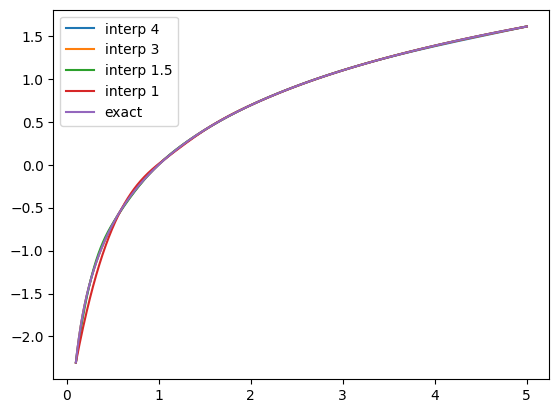

In [263]:
plt.plot(interp_grid, cubic_f_4(expanding_grid_4), label = 'interp 4')
plt.plot(interp_grid, cubic_f_3(expanding_grid_3), label = 'interp 3')
plt.plot(interp_grid, cubic_f_2(expanding_grid_2), label = 'interp 1.5')
plt.plot(interp_grid, cubic_f_1(expanding_grid_1), label = 'interp 1')
plt.plot(interp_grid, f(interp_grid), label = 'exact')
plt.legend()
plt.show()

Now, for root utility

In [265]:
def cubic_g_1(c):
    tck = interpolate.splrep(expanding_grid_1, g(c), k=3)
    return interpolate.splev(interp_grid, tck)

In [266]:
def cubic_g_2(c):
    tck = interpolate.splrep(expanding_grid_2, g(c), k=3)
    return interpolate.splev(interp_grid, tck)

In [267]:
def cubic_g_3(c):
    tck = interpolate.splrep(expanding_grid_3, g(c), k=3)
    return interpolate.splev(interp_grid, tck)

In [268]:
def cubic_g_4(c):
    tck = interpolate.splrep(expanding_grid_4, g(c), k=3)
    return interpolate.splev(interp_grid, tck)

In [269]:
cubic_g_1(expanding_grid_1)
print(cubic_g_1(expanding_grid_1))

[0.31622777 0.32212928 0.32799801 ... 2.23387464 2.23497157 2.23606798]


In [270]:
cubic_g_2(expanding_grid_2)
print(cubic_g_2(expanding_grid_2))

[0.31622777 0.32320061 0.33010083 ... 2.23387223 2.23497035 2.23606798]


In [271]:
cubic_g_3(expanding_grid_3)
print(cubic_g_3(expanding_grid_3))

[0.31622777 0.32388269 0.3313625  ... 2.23384392 2.23495611 2.23606798]


In [272]:
cubic_g_4(expanding_grid_4)
print(cubic_g_4(expanding_grid_4))

[0.31622777 0.32388261 0.3313611  ... 2.23379334 2.2349307  2.23606798]


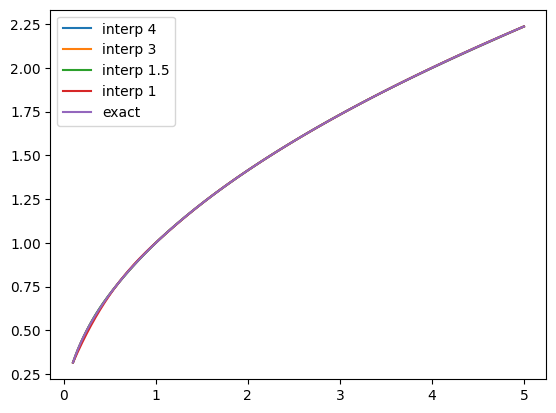

In [273]:
plt.plot(interp_grid, cubic_g_4(expanding_grid_4), label = 'interp 4')
plt.plot(interp_grid, cubic_g_3(expanding_grid_3), label = 'interp 3')
plt.plot(interp_grid, cubic_g_2(expanding_grid_2), label = 'interp 1.5')
plt.plot(interp_grid, cubic_g_1(expanding_grid_1), label = 'interp 1')
plt.plot(interp_grid, g(interp_grid), label = 'exact')
plt.legend()
plt.show()

Finally, let's do the CRRA cases

In [274]:
def cubic_h_1(c, a):
    tck = interpolate.splrep(expanding_grid_1, h(c, a), k=3)
    return interpolate.splev(interp_grid, tck)

In [275]:
def cubic_h_2(c, a):
    tck = interpolate.splrep(expanding_grid_2, h(c, a), k=3)
    return interpolate.splev(interp_grid, tck)

In [276]:
def cubic_h_3(c, a):
    tck = interpolate.splrep(expanding_grid_3, h(c, a), k=3)
    return interpolate.splev(interp_grid, tck)

In [277]:
def cubic_h_4(c, a):
    tck = interpolate.splrep(expanding_grid_4, h(c, a), k=3)
    return interpolate.splev(interp_grid, tck)

In [278]:
for a in a_values:
    cubic_h_1(expanding_grid_1, a)
    print(cubic_h_1(expanding_grid_1,a))

    cubic_h_2(expanding_grid_2, a)
    print(cubic_h_2(expanding_grid_2,a))


    cubic_h_3(expanding_grid_3, a)
    print(cubic_h_3(expanding_grid_3,a))


    cubic_h_4(expanding_grid_4, a)
    print(cubic_h_4(expanding_grid_4,a))



[-10.          -9.85062922  -9.70288692 ...  -0.20039171  -0.20019566
  -0.2       ]
[-10.          -9.71845481  -9.44352784 ...  -0.20038776  -0.20019367
  -0.2       ]
[-10.          -9.53288847  -9.10587642 ...  -0.20051327  -0.20025686
  -0.2       ]
[-10.          -9.53296775  -9.10721447 ...  -0.20074052  -0.20037101
  -0.2       ]
[-2.50000000e+03 -2.45228230e+03 -2.40512725e+03 ...  1.07754192e-03
  3.50106229e-04 -4.00000000e-04]
[-2.50000000e+03 -2.37675711e+03 -2.25695896e+03 ...  1.08861596e-02
  5.30235382e-03 -4.00000000e-04]
[-2.50000000e+03 -2.06461014e+03 -1.70810140e+03 ... -2.52245931e-02
 -1.28840698e-02 -4.00000000e-04]
[-2.50000000e+03 -2.06516822e+03 -1.71817256e+03 ...  1.09572679e-01
  5.48408742e-02 -4.00000000e-04]
[-1.11111111e+08 -1.08987410e+08 -1.06888768e+08 ...  6.61511427e+01
  3.35818301e+01 -5.68888889e-08]
[-1.11111111e+08 -1.05465735e+08 -9.99799779e+07 ...  5.44054593e+02
  2.74883701e+02 -5.68888889e-08]
[-1.11111111e+08 -7.22400598e+07 -4.379325

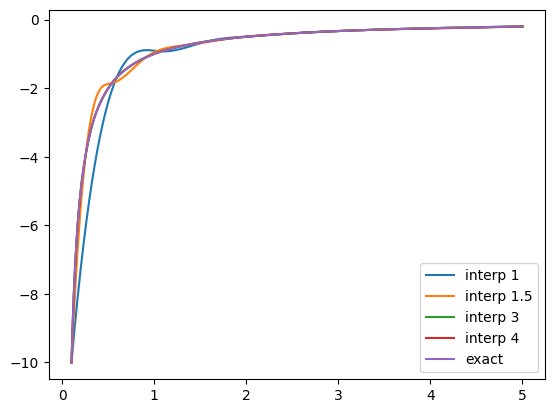

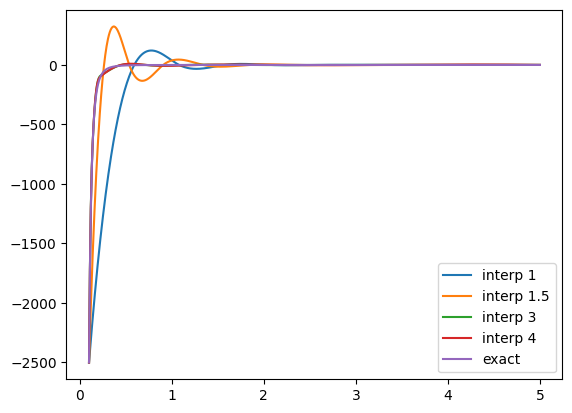

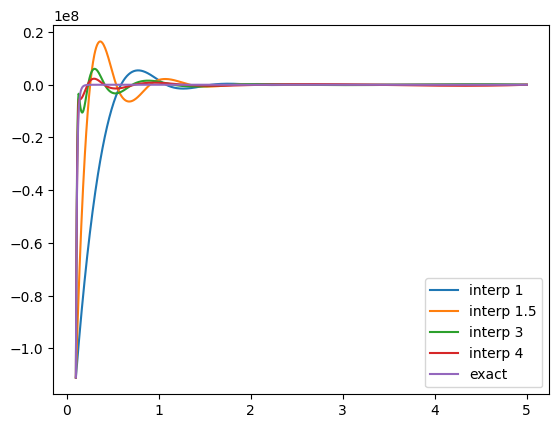

In [279]:
for a in a_values:
    cubic_h_1(expanding_grid_1, a)
    cubic_h_2(expanding_grid_2, a)
    cubic_h_3(expanding_grid_3, a)
    cubic_h_4(expanding_grid_4, a)
    plt.plot(interp_grid, cubic_h_1(expanding_grid_1, a), label = 'interp 1')
    plt.plot(interp_grid, cubic_h_2(expanding_grid_2, a), label = 'interp 1.5')
    plt.plot(interp_grid, cubic_h_3(expanding_grid_3, a), label = 'interp 3')
    plt.plot(interp_grid, cubic_h_4(expanding_grid_4, a), label = 'interp 4')
    plt.plot(interp_grid, h(interp_grid, a), label = 'exact')
    plt.legend()
    plt.show()

Now, let's work on Chebyshev polynomials

In [386]:
deg_values=np.linspace(1, 21,21, dtype=int)
print(deg_values)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


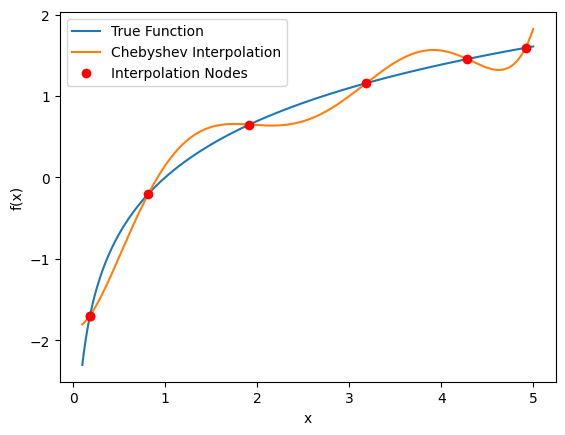

In [430]:
#Generate the Chebyshev nodes for deg = 6
cheb_nodes = np.cos(np.pi *(2 * np.arange(1, 6 + 2) - 1) / ( 2 * 6))
x_nodes = 1/2 * (0.1+5) + 1/2 * (5 - 0.1) * cheb_nodes
y_nodes = f(x_nodes)
cheb_coeffs=chebfit(cheb_nodes, y_nodes, 6)
y_interp=chebval((2 * interp_grid - 0.1 - 5) / (5 - 0.1), cheb_coeffs)
plt.plot(interp_grid, f(interp_grid), label='True Function')
plt.plot(interp_grid, y_interp, label='Chebyshev Interpolation')
plt.plot(x_nodes, y_nodes, 'ro', label='Interpolation Nodes')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

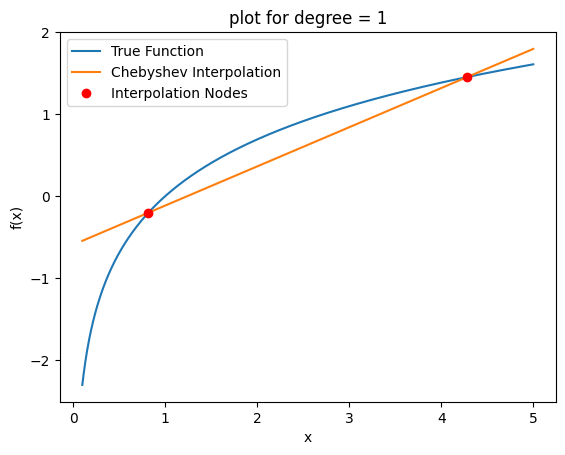

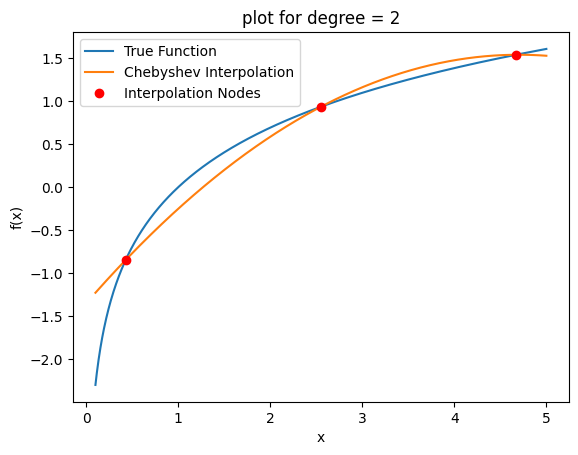

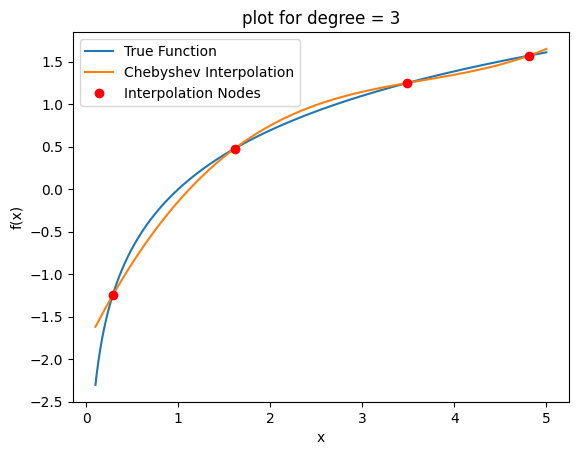

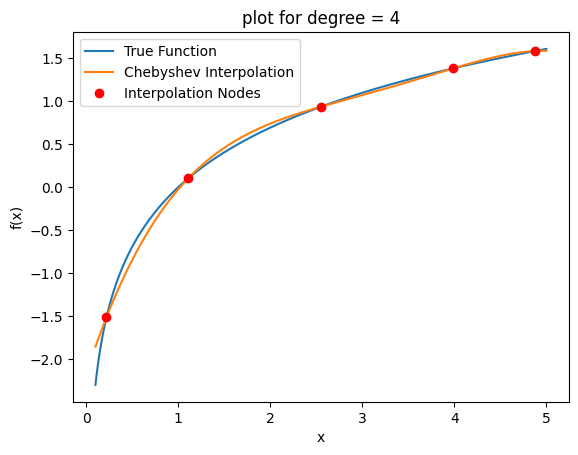

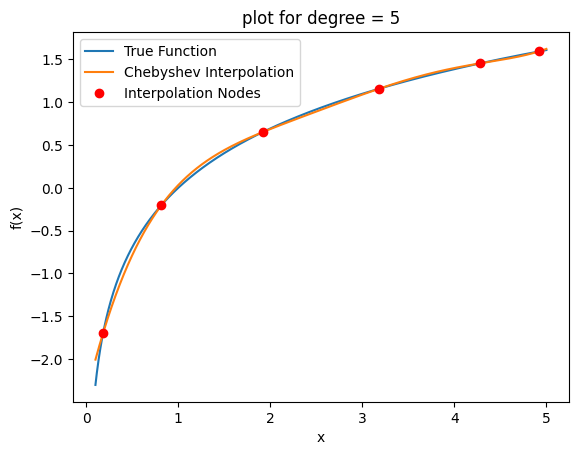

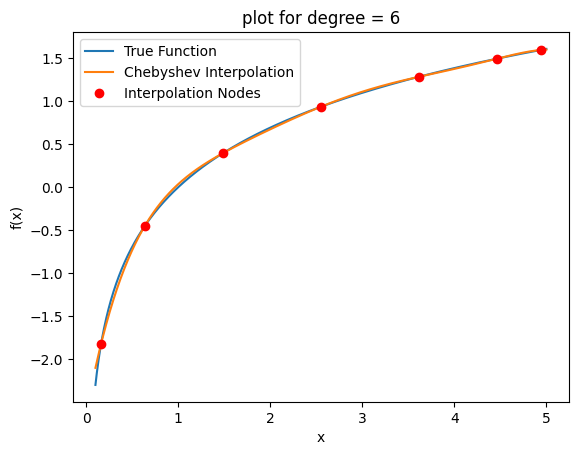

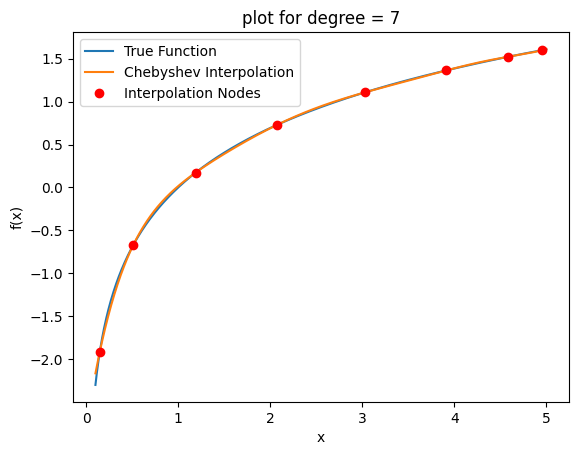

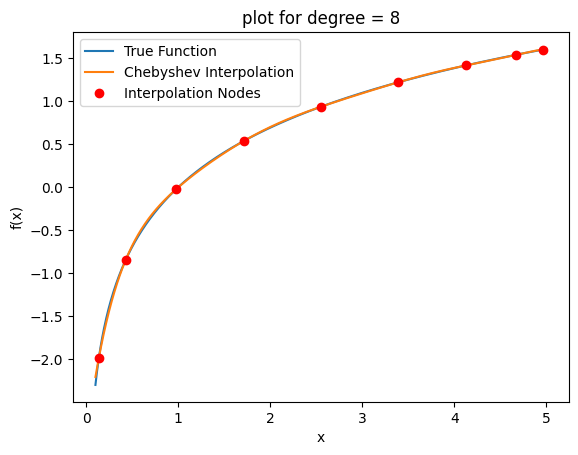

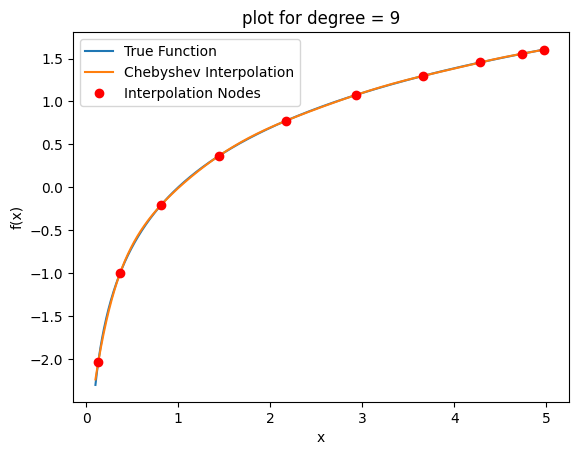

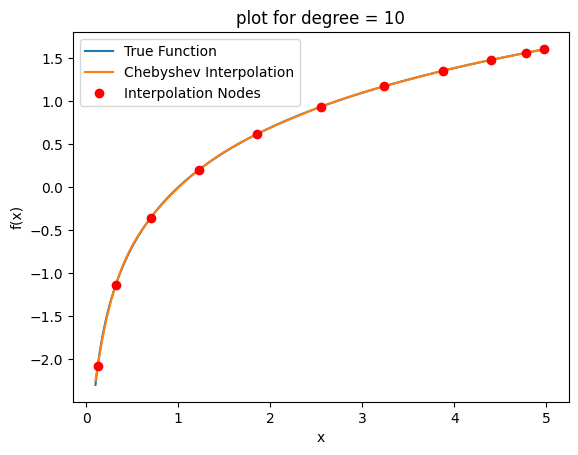

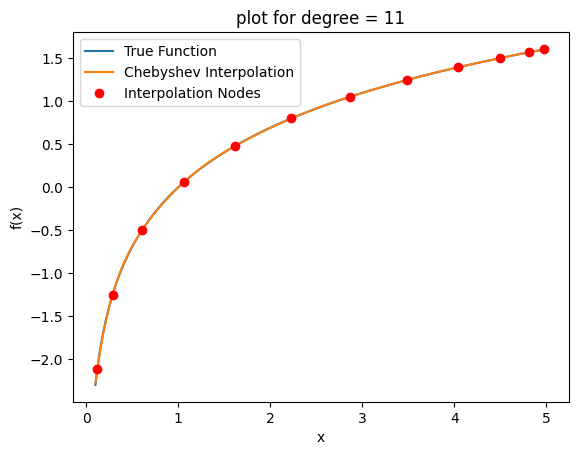

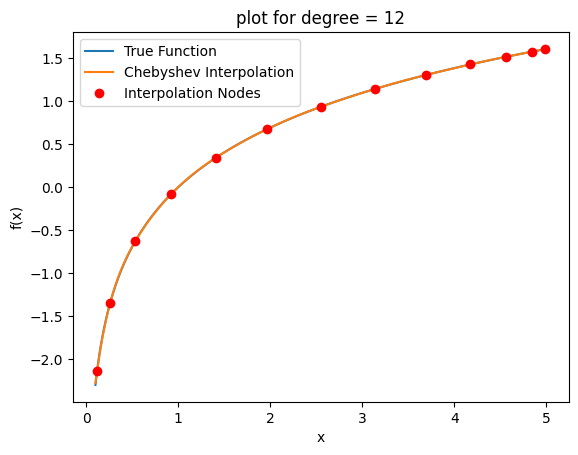

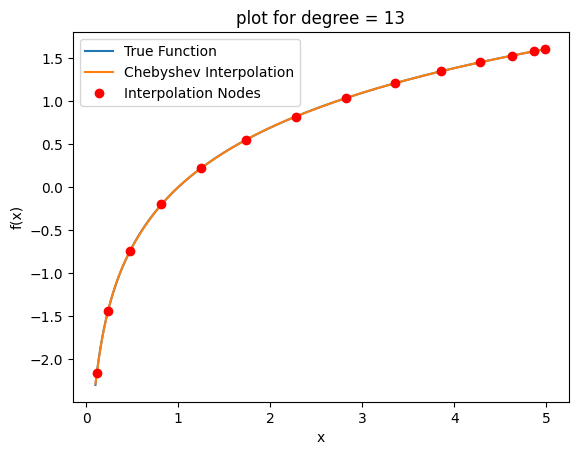

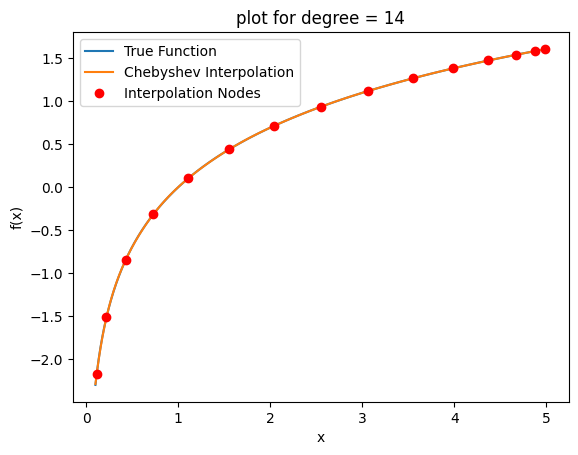

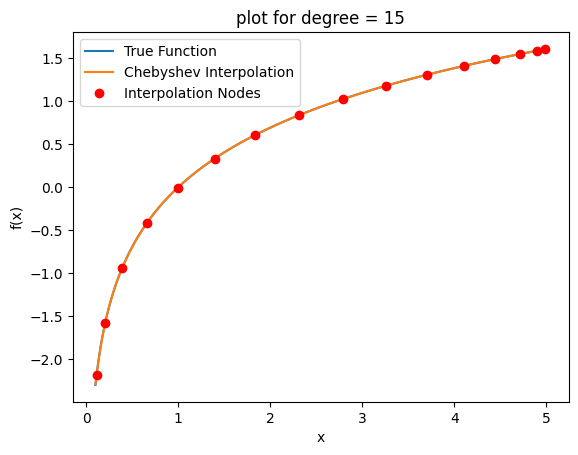

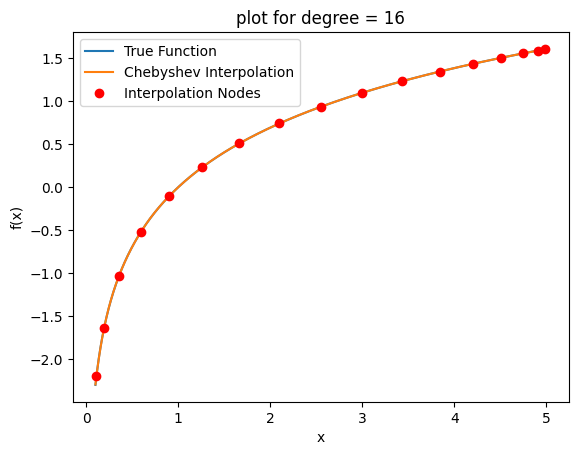

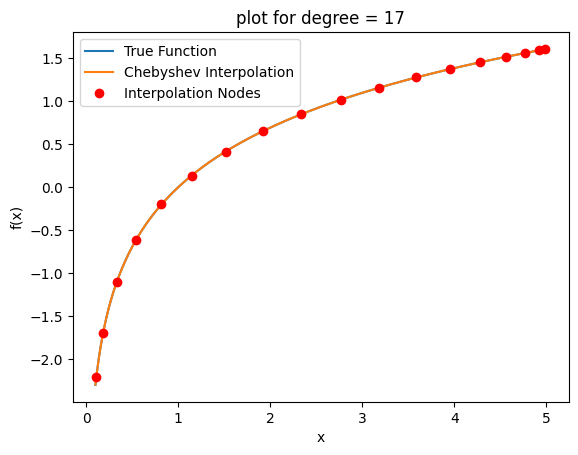

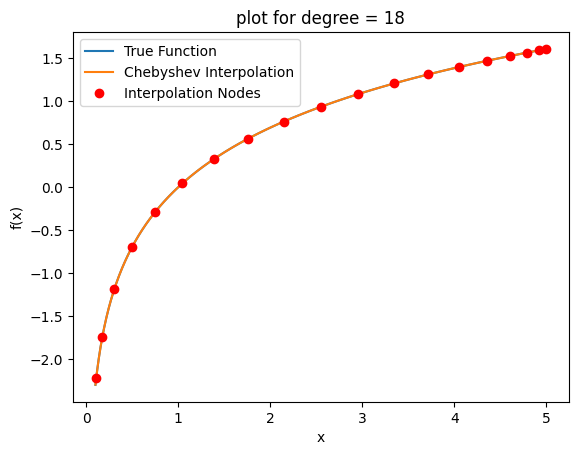

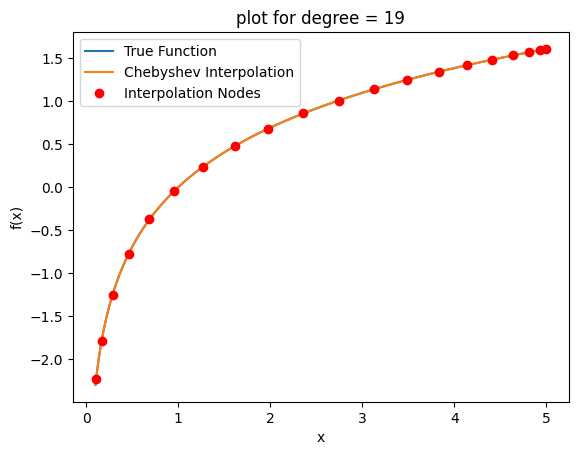

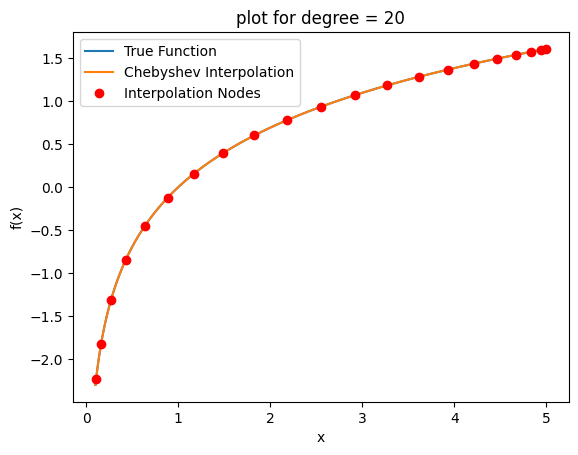

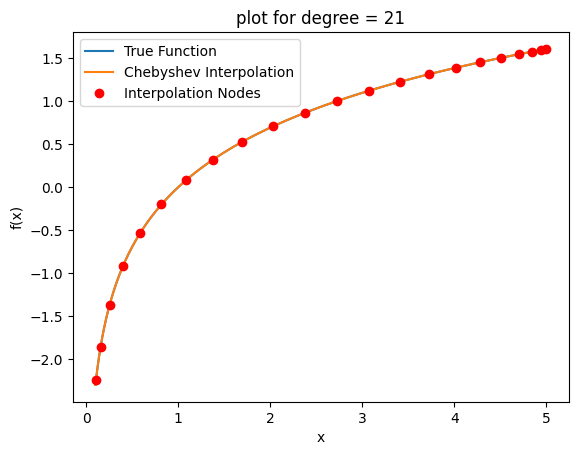

In [434]:
for deg in deg_values:
    cheb_nodes = np.cos(np.pi *(2 * np.arange(1, deg + 2) - 1) / ( 2 * (deg + 1)))
    x_nodes = 1/2 * (0.1+5) + 1/2 * (5 - 0.1) * cheb_nodes
    y_nodes = f(x_nodes)
    cheb_coeffs=chebfit(cheb_nodes, y_nodes, deg)
    y_interp=chebval((2 * interp_grid - 0.1 - 5) / (5 - 0.1), cheb_coeffs)
    plt.plot(interp_grid, f(interp_grid), label='True Function')
    plt.plot(interp_grid, y_interp, label='Chebyshev Interpolation')
    plt.plot(x_nodes, y_nodes, 'ro', label='Interpolation Nodes')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title(f'plot for degree = {deg}')
    plt.show()

Part 2 - Extrapolation

First, let us evaluate our utility functions outside the grid.
 

Log utility

In [453]:
vec_extrap_f=np.zeros(shape=(4,1))
for i in range(len(vec_extrap_f)):
    if i == 0:
        vec_extrap_f[i]=f(0.05)
    if i == 1:
        vec_extrap_f[i]=f(5.1)
    if i == 2:
        vec_extrap_f[i]=f(5.5)
    if i == 3:
        vec_extrap_f[i]=f(6)
print(vec_extrap_f)

[[-2.99573227]
 [ 1.62924054]
 [ 1.70474809]
 [ 1.79175947]]


Root utility

In [454]:
vec_extrap_g=np.zeros(shape=(4,1))
for i in range(len(vec_extrap_g)):
    if i == 0:
        vec_extrap_g[i]=g(0.05)
    if i == 1:
        vec_extrap_g[i]=g(5.1)
    if i == 2:
        vec_extrap_g[i]=g(5.5)
    if i == 3:
        vec_extrap_g[i]=g(6)
print(vec_extrap_g)

[[0.2236068 ]
 [2.25831796]
 [2.34520788]
 [2.44948974]]


CRRA, 2

In [455]:
vec_extrap_h_2=np.zeros(shape=(4,1))
for i in range(len(vec_extrap_h_2)):
    if i == 0:
        vec_extrap_h_2[i]=h(0.05,2)
    if i == 1:
        vec_extrap_h_2[i]=h(5.1,2)
    if i == 2:
        vec_extrap_h_2[i]=h(5.5,2)
    if i == 3:
        vec_extrap_h_2[i]=h(6,2)
print(vec_extrap_h_2)

[[-20.        ]
 [ -0.19607843]
 [ -0.18181818]
 [ -0.16666667]]


CRRA, 5

In [456]:
vec_extrap_h_5=np.zeros(shape=(4,1))
for i in range(len(vec_extrap_h_5)):
    if i == 0:
        vec_extrap_h_5[i]=h(0.05,5)
    if i == 1:
        vec_extrap_h_5[i]=h(5.1,5)
    if i == 2:
        vec_extrap_h_5[i]=h(5.5,5)
    if i == 3:
        vec_extrap_h_5[i]=h(6,5)
print(vec_extrap_h_5)

[[-4.00000000e+04]
 [-3.69538170e-04]
 [-2.73205382e-04]
 [-1.92901235e-04]]


CRRA, 10

In [457]:
vec_extrap_h_10=np.zeros(shape=(4,1))
for i in range(len(vec_extrap_h_10)):
    if i == 0:
        vec_extrap_h_10[i]=h(0.05,10)
    if i == 1:
        vec_extrap_h_10[i]=h(5.1,10)
    if i == 2:
        vec_extrap_h_10[i]=h(5.5,10)
    if i == 3:
        vec_extrap_h_10[i]=h(6,10)
print(vec_extrap_h_10)

[[-5.68888889e+10]
 [-4.76020773e-08]
 [-2.41264423e-08]
 [-1.10254478e-08]]


Now, let us extrapolate our interpolations outside the grid

first, log

In [517]:
extrap_f=interpolate.interp1d(expanding_grid_1[:,0], f(expanding_grid_1)[:,0], kind='linear', fill_value='extrapolate')
extrap_f_2=interpolate.interp1d(expanding_grid_2[:,0], f(expanding_grid_2)[:,0], kind='linear', fill_value='extrapolate')
extrap_f_3=interpolate.interp1d(expanding_grid_3[:,0], f(expanding_grid_3)[:,0], kind='linear', fill_value='extrapolate')
extrap_f_4=interpolate.interp1d(expanding_grid_4[:,0], f(expanding_grid_4)[:,0], kind='linear', fill_value='extrapolate')

In [696]:
y_interp=extrap_f(expanding_grid_1)
y_interp_2=extrap_f_2(expanding_grid_2)
y_interp_3=extrap_f_3(expanding_grid_3)
y_interp_4=extrap_f_4(expanding_grid_4)

In [528]:
extrapolated_values=np.array([0.05,5.1,5.5,6])

In [638]:
extrapolated_y=extrap_f(extrapolated_values)
extrapolated_y_2=extrap_f_2(extrapolated_values)
extrapolated_y_3=extrap_f_3(extrapolated_values)
extrapolated_y_4=extrap_f_4(extrapolated_values)

[-2.48370268  1.63048705  1.71468358  1.81992926]


In [600]:
larger_grid=np.linspace(0.05,6,1001)

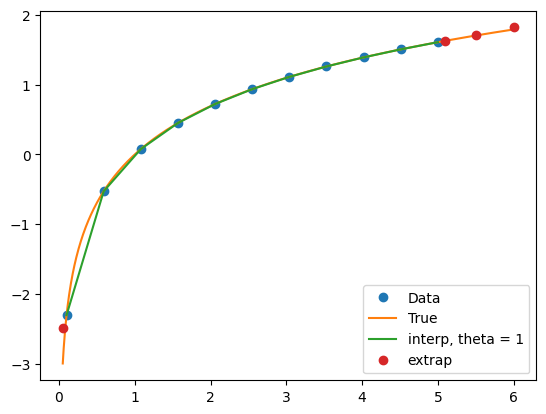

In [601]:
plt.plot(expanding_grid_1[:,0], f(expanding_grid_1)[:,0], 'o', label='Data')
plt.plot(larger_grid, f(larger_grid), label = 'True')
plt.plot(expanding_grid_1, y_interp, label = 'interp, theta = 1')
plt.plot(extrapolated_values, extrapolated_y, 'o', label = 'extrap')
plt.legend()

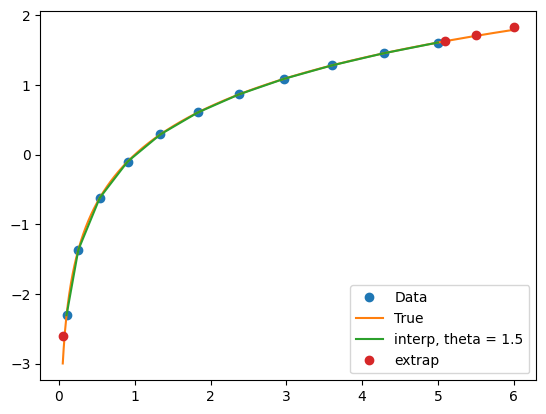

In [602]:
plt.plot(expanding_grid_2[:,0], f(expanding_grid_2)[:,0], 'o', label='Data')
plt.plot(larger_grid, f(larger_grid), label = 'True')
plt.plot(expanding_grid_2, y_interp_2, label = 'interp, theta = 1.5')
plt.plot(extrapolated_values, extrapolated_y_2, 'o', label = 'extrap')
plt.legend()

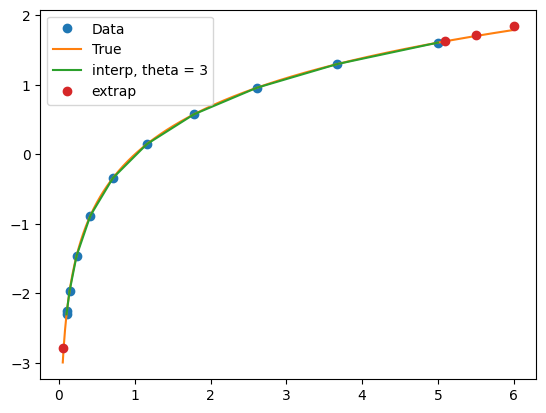

In [603]:
plt.plot(expanding_grid_3[:,0], f(expanding_grid_3)[:,0], 'o', label='Data')
plt.plot(larger_grid, f(larger_grid), label = 'True')
plt.plot(expanding_grid_3, y_interp_3, label = 'interp, theta = 3')
plt.plot(extrapolated_values, extrapolated_y_3, 'o', label = 'extrap')
plt.legend()

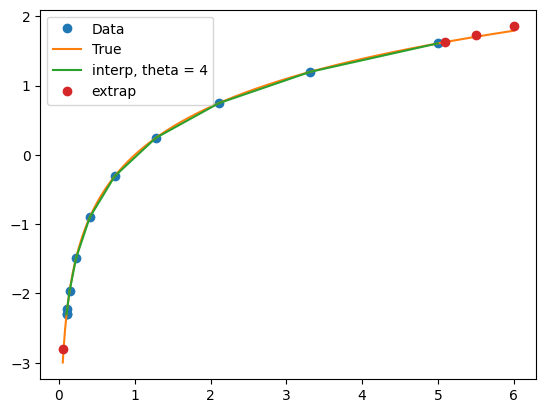

In [604]:
plt.plot(expanding_grid_4[:,0], f(expanding_grid_4)[:,0], 'o', label='Data')
plt.plot(larger_grid, f(larger_grid), label = 'True')
plt.plot(expanding_grid_4, y_interp_4, label = 'interp, theta = 4')
plt.plot(extrapolated_values, extrapolated_y_4, 'o', label = 'extrap')
plt.legend()

Finally, let's calculate the errors when extrapolating in each case

In [684]:
error = np.zeros(shape=(4,1))
error[0] = np.abs((f(0.05) - extrap_f(0.05))) / f(0.05)
error[1] = np.abs((f(5.1) - extrap_f(5.1)))/ f(5.1)
error[2] = np.abs((f(5.5) - extrap_f(5.5))) / f(5.5)
error[3] = np.abs((f(6) - extrap_f(6))) / f(6)
print(np.max(np.abs(error))*100)

17.091967738651643


In [685]:
error_2 = np.zeros(shape=(4,1))
error_2[0] = np.abs((f(0.05) - extrap_f_2(0.05))) / f(0.05)
#print(error_2[0])
error_2[1] = np.abs((f(5.1) - extrap_f_2(5.1)))/ f(5.1)
#print(error_2[1])
error_2[2] = np.abs((f(5.5) - extrap_f_2(5.5))) / f(5.5)
#print(error_2[2])
error_2[3] = np.abs((f(6) - extrap_f_2(6))) / f(6)
#print(error_2[3])
print(np.max(np.abs(error_2))*100)

13.056858227897134


In [686]:
error_3 = np.zeros(shape=(4,1))
error_3[0] = np.abs((f(0.05) - extrap_f_3(0.05))) / f(0.05)
#print(error_3[0])
error_3[1] = np.abs((f(5.1) - extrap_f_3(5.1)))/ f(5.1)
#print(error_3[1])
error_3[2] = np.abs((f(5.5) - extrap_f_3(5.5))) / f(5.5)
#print(error_3[2])
error_3[3] = np.abs((f(6) - extrap_f_3(6))) / f(6)
#print(error_3[3])
print(np.max(np.abs(error_3))*100)

6.843440848822177


In [687]:
error = np.zeros(shape=(4,1))
error[0] = np.abs((f(0.05) - extrap_f_4(0.05))) / f(0.05)
error[1] = np.abs((f(5.1) - extrap_f_4(5.1)))/ f(5.1)
error[2] = np.abs((f(5.5) - extrap_f_4(5.5))) / f(5.5)
error[3] = np.abs((f(6) - extrap_f_4(6))) / f(6)
print(np.max(np.abs(error))*100)

6.488169695865646


next, cubic

In [609]:
cubic_extrap_f=interpolate.interp1d(expanding_grid_1[:,0], f(expanding_grid_1)[:,0], kind='cubic', fill_value='extrapolate')
cubic_extrap_f_2=interpolate.interp1d(expanding_grid_2[:,0], f(expanding_grid_2)[:,0], kind='cubic', fill_value='extrapolate')
cubic_extrap_f_3=interpolate.interp1d(expanding_grid_3[:,0], f(expanding_grid_3)[:,0], kind='cubic', fill_value='extrapolate')
cubic_extrap_f_4=interpolate.interp1d(expanding_grid_4[:,0], f(expanding_grid_4)[:,0], kind='cubic', fill_value='extrapolate')

In [626]:
cubic_y_interp=cubic_extrap_f(larger_grid)
cubic_y_interp_2=cubic_extrap_f_2(larger_grid)
cubic_y_interp_3=cubic_extrap_f_3(larger_grid)
cubic_y_interp_4=cubic_extrap_f_4(larger_grid)

In [719]:
cubic_extrapolated_y=cubic_extrap_f(extrapolated_values)
cubic_extrapolated_y_2=cubic_extrap_f_2(extrapolated_values)
cubic_extrapolated_y_3=cubic_extrap_f_3(extrapolated_values)
cubic_extrapolated_y_4=cubic_extrap_f_4(extrapolated_values)

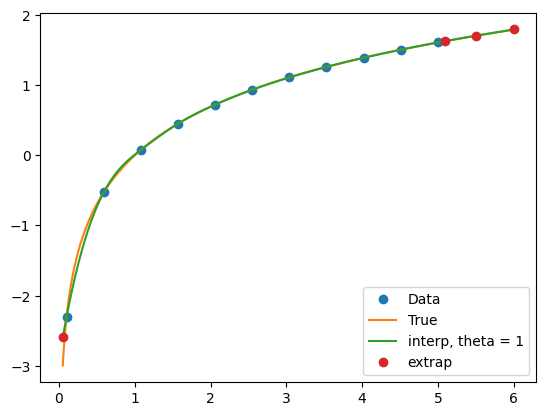

In [662]:
plt.plot(expanding_grid_1[:,0], f(expanding_grid_1)[:,0], 'o', label='Data')
plt.plot(larger_grid, f(larger_grid), label = 'True')
plt.plot(larger_grid, cubic_y_interp, label = 'interp, theta = 1')
plt.plot(extrapolated_values, cubic_extrapolated_y, 'o', label = 'extrap')
plt.legend()

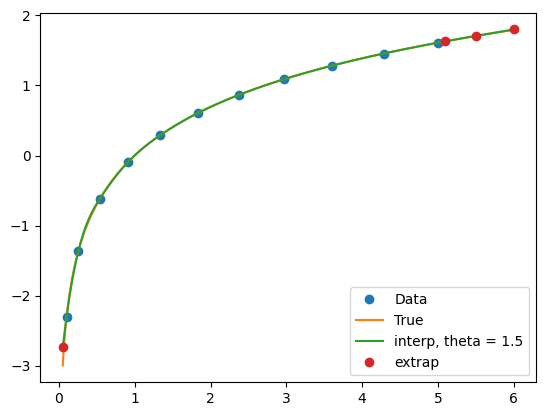

In [663]:
plt.plot(expanding_grid_2[:,0], f(expanding_grid_2)[:,0], 'o', label='Data')
plt.plot(larger_grid, f(larger_grid), label = 'True')
plt.plot(larger_grid, cubic_y_interp_2, label = 'interp, theta = 1.5')
plt.plot(extrapolated_values, cubic_extrapolated_y_2, 'o', label = 'extrap')
plt.legend()

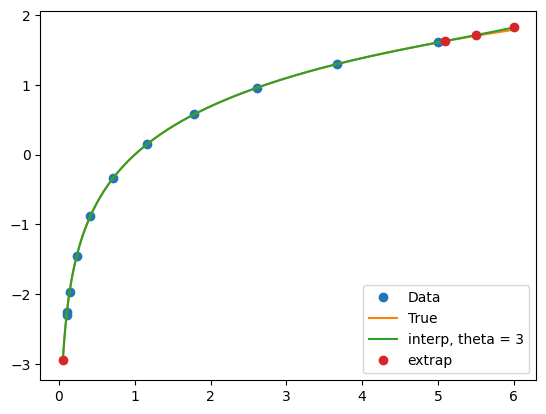

In [642]:
plt.plot(expanding_grid_3[:,0], f(expanding_grid_3)[:,0], 'o', label='Data')
plt.plot(larger_grid, f(larger_grid), label = 'True')
plt.plot(larger_grid, cubic_y_interp_3, label = 'interp, theta = 3')
plt.plot(extrapolated_values, cubic_extrapolated_y_3, 'o', label = 'extrap')
plt.legend()

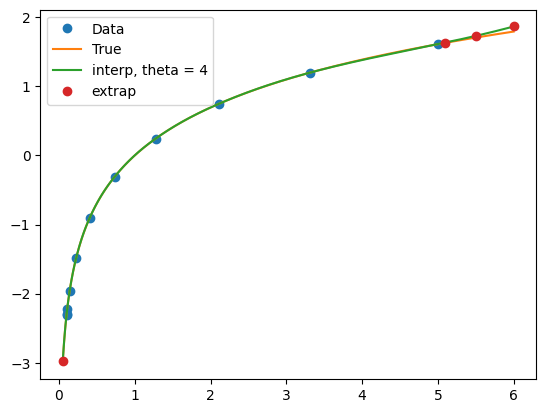

In [643]:
plt.plot(expanding_grid_4[:,0], f(expanding_grid_4)[:,0], 'o', label='Data')
plt.plot(larger_grid, f(larger_grid), label = 'True')
plt.plot(larger_grid, cubic_y_interp_4, label = 'interp, theta = 4')
plt.plot(extrapolated_values, cubic_extrapolated_y_4, 'o', label = 'extrap')
plt.legend()

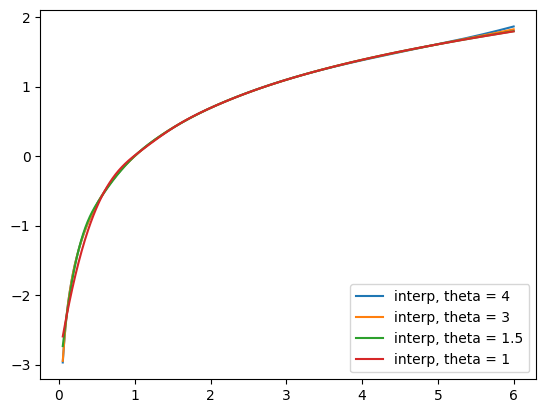

In [645]:
plt.plot(larger_grid, cubic_y_interp_4, label = 'interp, theta = 4')
plt.plot(larger_grid, cubic_y_interp_3, label = 'interp, theta = 3')
plt.plot(larger_grid, cubic_y_interp_2, label = 'interp, theta = 1.5')
plt.plot(larger_grid, cubic_y_interp, label = 'interp, theta = 1')
plt.legend()

In [689]:
error = np.zeros(shape=(4,1))
error[0] = np.abs((f(0.05) - cubic_extrap_f(0.05))) / f(0.05)
error[1] = np.abs((f(5.1) - cubic_extrap_f(5.1)))/ f(5.1)
error[2] = np.abs((f(5.5) - cubic_extrap_f(5.5))) / f(5.5)
error[3] = np.abs((f(6) - cubic_extrap_f(6))) / f(6)
print(np.max(np.abs(error))*100)

13.380574854307431


In [690]:
error = np.zeros(shape=(4,1))
error[0] = np.abs((f(0.05) - cubic_extrap_f_2(0.05))) / f(0.05)
error[1] = np.abs((f(5.1) - cubic_extrap_f_2(5.1)))/ f(5.1)
error[2] = np.abs((f(5.5) - cubic_extrap_f_2(5.5))) / f(5.5)
error[3] = np.abs((f(6) - cubic_extrap_f_2(6))) / f(6)
print(np.max(np.abs(error))*100)

8.751300063570161


In [691]:
error = np.zeros(shape=(4,1))
error[0] = np.abs((f(0.05) - cubic_extrap_f_3(0.05))) / f(0.05)
error[1] = np.abs((f(5.1) - cubic_extrap_f_3(5.1)))/ f(5.1)
error[2] = np.abs((f(5.5) - cubic_extrap_f_3(5.5))) / f(5.5)
error[3] = np.abs((f(6) - cubic_extrap_f_3(6))) / f(6)
print(np.max(np.abs(error))*100)

1.8345039961374001


In [692]:
error = np.zeros(shape=(4,1))
error[0] = np.abs((f(0.05) - cubic_extrap_f_4(0.05))) / f(0.05)
error[1] = np.abs((f(5.1) - cubic_extrap_f_4(5.1)))/ f(5.1)
error[2] = np.abs((f(5.5) - cubic_extrap_f_4(5.5))) / f(5.5)
error[3] = np.abs((f(6) - cubic_extrap_f_4(6))) / f(6)
print(np.max(np.abs(error))*100)

4.103975840153397


Now for root utility

first, linear

In [693]:
extrap_g=interpolate.interp1d(expanding_grid_1[:,0], g(expanding_grid_1)[:,0], kind='linear', fill_value='extrapolate')
extrap_g_2=interpolate.interp1d(expanding_grid_2[:,0], g(expanding_grid_2)[:,0], kind='linear', fill_value='extrapolate')
extrap_g_3=interpolate.interp1d(expanding_grid_3[:,0], g(expanding_grid_3)[:,0], kind='linear', fill_value='extrapolate')
extrap_g_4=interpolate.interp1d(expanding_grid_4[:,0], g(expanding_grid_4)[:,0], kind='linear', fill_value='extrapolate')

In [695]:
g_interp=extrap_g(expanding_grid_1)
g_interp_2=extrap_g_2(expanding_grid_2)
g_interp_3=extrap_g_3(expanding_grid_3)
g_interp_4=extrap_g_4(expanding_grid_4)

In [697]:
extrapolated_g=extrap_g(extrapolated_values)
extrapolated_g_2=extrap_g_2(extrapolated_values)
extrapolated_g_3=extrap_g_3(extrapolated_values)
extrapolated_g_4=extrap_g_4(extrapolated_values)

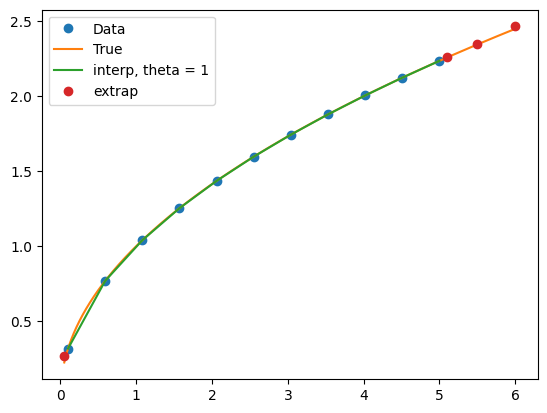

In [701]:
plt.plot(expanding_grid_1[:,0], g(expanding_grid_1)[:,0], 'o', label='Data')
plt.plot(larger_grid, g(larger_grid), label = 'True')
plt.plot(expanding_grid_1, g_interp, label = 'interp, theta = 1')
plt.plot(extrapolated_values, extrapolated_g, 'o', label = 'extrap')
plt.legend()


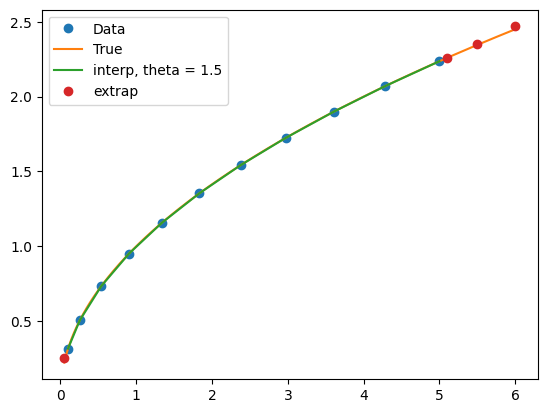

In [712]:
plt.plot(expanding_grid_2[:,0], g(expanding_grid_2)[:,0], 'o', label='Data')
plt.plot(larger_grid, g(larger_grid), label = 'True')
plt.plot(expanding_grid_2, g_interp_2, label = 'interp, theta = 1.5')
plt.plot(extrapolated_values, extrapolated_g_2, 'o', label = 'extrap')
plt.legend()

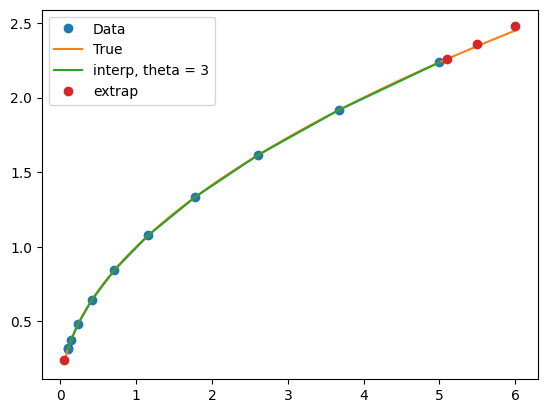

In [713]:
plt.plot(expanding_grid_3[:,0], g(expanding_grid_3)[:,0], 'o', label='Data')
plt.plot(larger_grid, g(larger_grid), label = 'True')
plt.plot(expanding_grid_3, g_interp_3, label = 'interp, theta = 3')
plt.plot(extrapolated_values, extrapolated_g_3, 'o', label = 'extrap')
plt.legend()

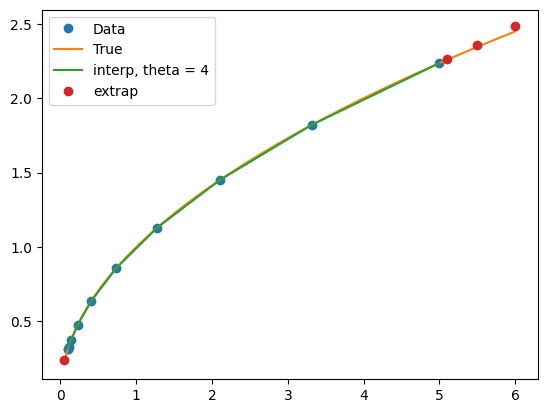

In [714]:
plt.plot(expanding_grid_4[:,0], g(expanding_grid_4)[:,0], 'o', label='Data')
plt.plot(larger_grid, g(larger_grid), label = 'True')
plt.plot(expanding_grid_4, g_interp_4, label = 'interp, theta = 4')
plt.plot(extrapolated_values, extrapolated_g_4, 'o', label = 'extrap')
plt.legend()

In [726]:
error = np.zeros(shape=(4,1))
error[0] = np.abs((g(0.05) - extrap_g(0.05))) / g(0.05)
error[1] = np.abs((g(5.1) - extrap_g(5.1)))/ g(5.1)
error[2] = np.abs((g(5.5) - extrap_g(5.5))) / g(5.5)
error[3] = np.abs((g(6) - extrap_g(6))) / g(6)
print(np.max(np.abs(error))*100)

20.799935369039723


In [727]:
error = np.zeros(shape=(4,1))
error[0] = np.abs((g(0.05) - extrap_g_2(0.05))) / g(0.05)
error[1] = np.abs((g(5.1) - extrap_g_2(5.1)))/ g(5.1)
error[2] = np.abs((g(5.5) - extrap_g_2(5.5))) / g(5.5)
error[3] = np.abs((g(6) - extrap_g_2(6))) / g(6)
print(np.max(np.abs(error))*100)

14.190593168759225


In [728]:
error = np.zeros(shape=(4,1))
error[0] = np.abs((g(0.05) - extrap_g_3(0.05))) / g(0.05)
error[1] = np.abs((g(5.1) - extrap_g_3(5.1)))/ g(5.1)
error[2] = np.abs((g(5.5) - extrap_g_3(5.5))) / g(5.5)
error[3] = np.abs((g(6) - extrap_g_3(6))) / g(6)
print(np.max(np.abs(error))*100)

6.48882327108746


In [729]:
error = np.zeros(shape=(4,1))
error[0] = np.abs((g(0.05) - extrap_g_4(0.05))) / g(0.05)
error[1] = np.abs((g(5.1) - extrap_g_4(5.1)))/ g(5.1)
error[2] = np.abs((g(5.5) - extrap_g_4(5.5))) / g(5.5)
error[3] = np.abs((g(6) - extrap_g_4(6))) / g(6)
print(np.max(np.abs(error))*100)

6.10922168196975


now for cubic g

In [715]:
cubic_extrap_g=interpolate.interp1d(expanding_grid_1[:,0], g(expanding_grid_1)[:,0], kind='cubic', fill_value='extrapolate')
cubic_extrap_g_2=interpolate.interp1d(expanding_grid_2[:,0], g(expanding_grid_2)[:,0], kind='cubic', fill_value='extrapolate')
cubic_extrap_g_3=interpolate.interp1d(expanding_grid_3[:,0], g(expanding_grid_3)[:,0], kind='cubic', fill_value='extrapolate')
cubic_extrap_g_4=interpolate.interp1d(expanding_grid_4[:,0], g(expanding_grid_4)[:,0], kind='cubic', fill_value='extrapolate')

In [716]:
cubic_g_interp=cubic_extrap_g(larger_grid)
cubic_g_interp_2=cubic_extrap_g_2(larger_grid)
cubic_g_interp_3=cubic_extrap_g_3(larger_grid)
cubic_g_interp_4=cubic_extrap_g_4(larger_grid)

In [718]:
cubic_extrapolated_g=cubic_extrap_g(extrapolated_values)
cubic_extrapolated_g_2=cubic_extrap_g_2(extrapolated_values)
cubic_extrapolated_g_3=cubic_extrap_g_3(extrapolated_values)
cubic_extrapolated_g_4=cubic_extrap_g_4(extrapolated_values)

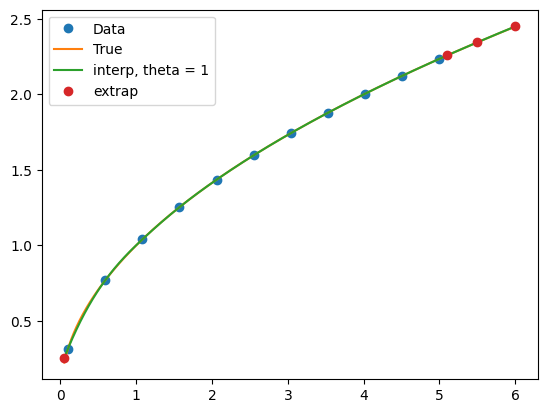

In [721]:
plt.plot(expanding_grid_1[:,0], g(expanding_grid_1)[:,0], 'o', label='Data')
plt.plot(larger_grid, g(larger_grid), label = 'True')
plt.plot(larger_grid, cubic_g_interp, label = 'interp, theta = 1')
plt.plot(extrapolated_values, cubic_extrapolated_g, 'o', label = 'extrap')
plt.legend()

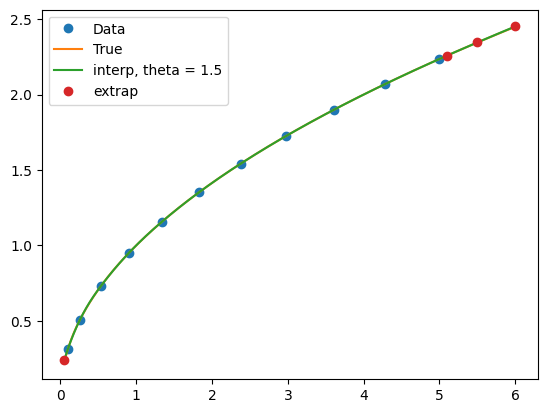

In [724]:
plt.plot(expanding_grid_2[:,0], g(expanding_grid_2)[:,0], 'o', label='Data')
plt.plot(larger_grid, g(larger_grid), label = 'True')
plt.plot(larger_grid, cubic_g_interp_2, label = 'interp, theta = 1.5')
plt.plot(extrapolated_values, cubic_extrapolated_g_2, 'o', label = 'extrap')
plt.legend()

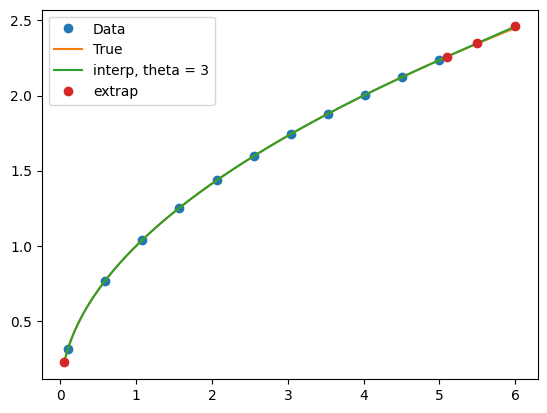

In [723]:
plt.plot(expanding_grid_1[:,0], g(expanding_grid_1)[:,0], 'o', label='Data')
plt.plot(larger_grid, g(larger_grid), label = 'True')
plt.plot(larger_grid, cubic_g_interp_3, label = 'interp, theta = 3')
plt.plot(extrapolated_values, cubic_extrapolated_g_3, 'o', label = 'extrap')
plt.legend()

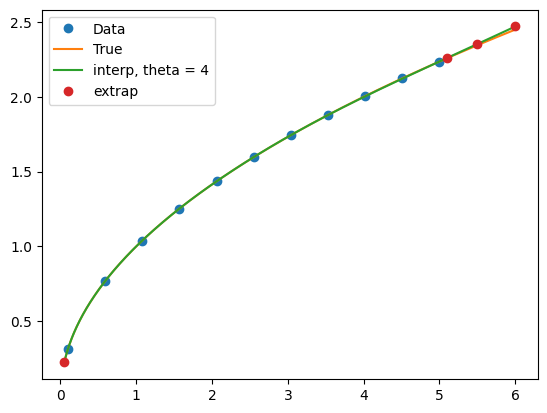

In [722]:
plt.plot(expanding_grid_1[:,0], g(expanding_grid_1)[:,0], 'o', label='Data')
plt.plot(larger_grid, g(larger_grid), label = 'True')
plt.plot(larger_grid, cubic_g_interp_4, label = 'interp, theta = 4')
plt.plot(extrapolated_values, cubic_extrapolated_g_4, 'o', label = 'extrap')
plt.legend()

In [742]:
error = np.zeros(shape=(4,1))
error[0] = np.abs((g(0.05) - cubic_extrap_g(0.05))) / g(0.05)
error[1] = np.abs((g(5.1) - cubic_extrap_g(5.1)))/ g(5.1)
error[2] = np.abs((g(5.5) - cubic_extrap_g(5.5))) / g(5.5)
error[3] = np.abs((g(6) - cubic_extrap_g(6))) / g(6)
print(np.max(np.abs(error))*100)
print(np.argmax(np.abs(error)))

13.636764656925541
0


In [743]:
error = np.zeros(shape=(4,1))
error[0] = np.abs((g(0.05) - cubic_extrap_g_2(0.05))) / g(0.05)
error[1] = np.abs((g(5.1) - cubic_extrap_g_2(5.1)))/ g(5.1)
error[2] = np.abs((g(5.5) - cubic_extrap_g_2(5.5))) / g(5.5)
error[3] = np.abs((g(6) - cubic_extrap_g_2(6))) / g(6)
print(np.max(np.abs(error))*100)
print(np.argmax(np.abs(error)))

7.672040819963791
0


In [744]:
error = np.zeros(shape=(4,1))
error[0] = np.abs((g(0.05) - cubic_extrap_g_3(0.05))) / g(0.05)
error[1] = np.abs((g(5.1) - cubic_extrap_g_3(5.1)))/ g(5.1)
error[2] = np.abs((g(5.5) - cubic_extrap_g_3(5.5))) / g(5.5)
error[3] = np.abs((g(6) - cubic_extrap_g_3(6))) / g(6)
print(np.max(np.abs(error))*100)
print(np.argmax(np.abs(error)))

1.0248119630094985
0


In [745]:
error = np.zeros(shape=(4,1))
error[0] = np.abs((g(0.05) - cubic_extrap_g_4(0.05))) / g(0.05)
error[1] = np.abs((g(5.1) - cubic_extrap_g_4(5.1)))/ g(5.1)
error[2] = np.abs((g(5.5) - cubic_extrap_g_4(5.5))) / g(5.5)
error[3] = np.abs((g(6) - cubic_extrap_g_4(6))) / g(6)
print(np.max(np.abs(error))*100)
print(np.argmax(np.abs(error)))

0.8628643093301778
3


Finally, let's do the three cases for CRRA utility

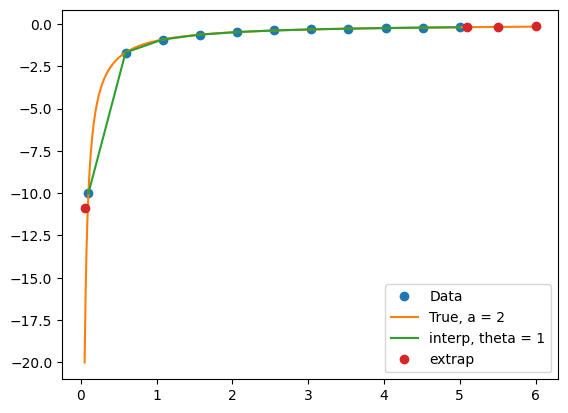

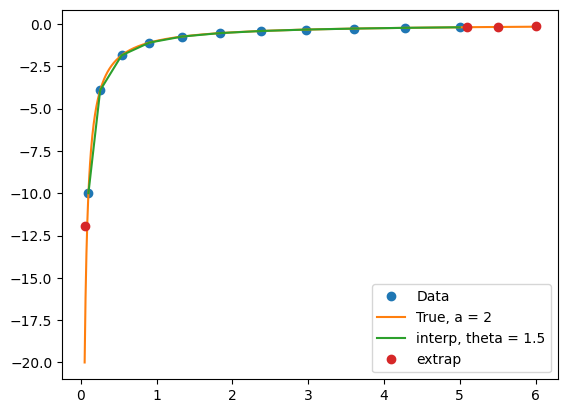

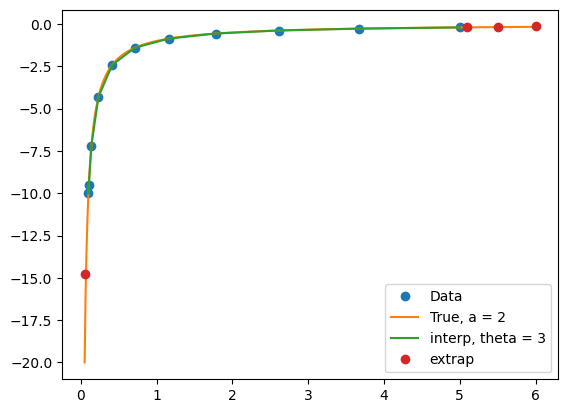

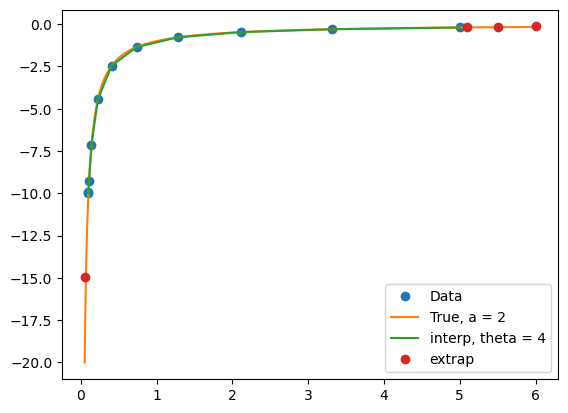

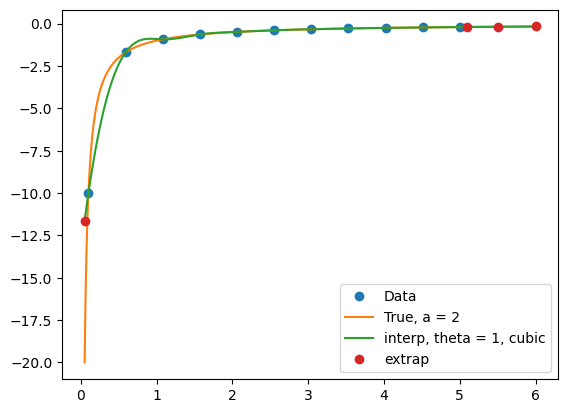

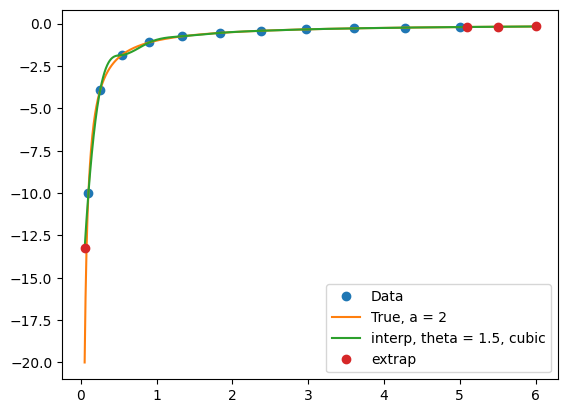

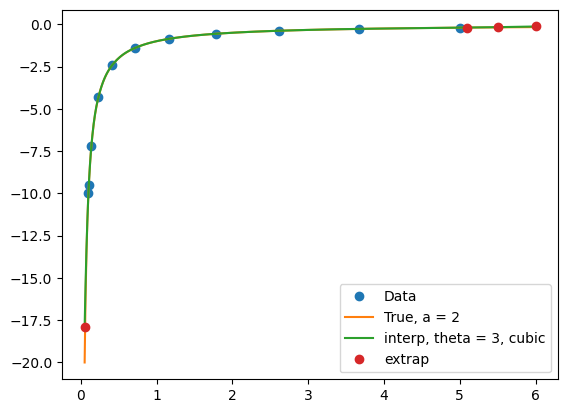

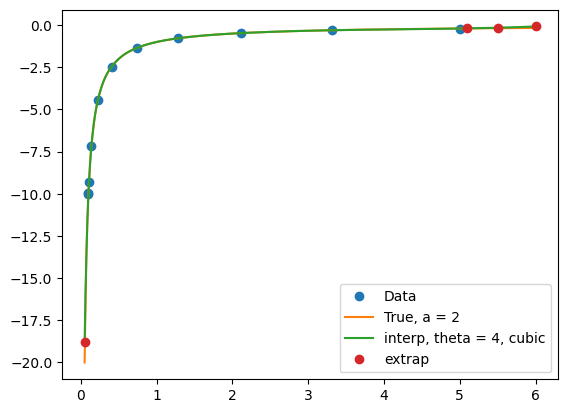

4951.1305274571705
0
5449.191808186084
0
6703.7546180117715
0
6797.300625613384
0
0.8628643093301778
0
6034.373252131599
0
8103.9762672611205
0
8495.03536698278
0


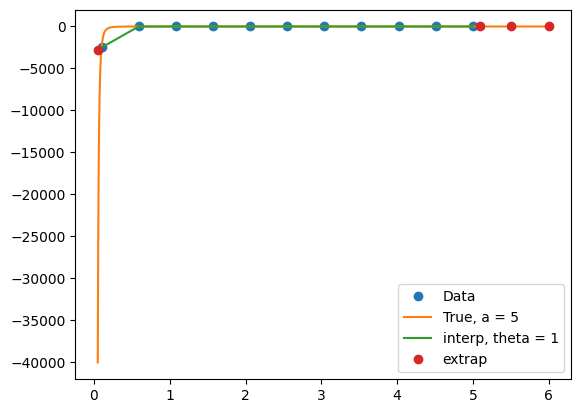

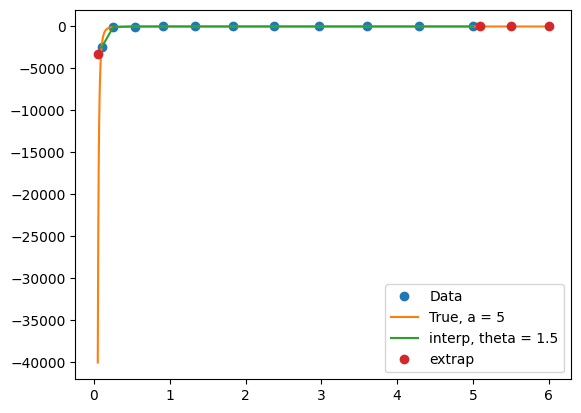

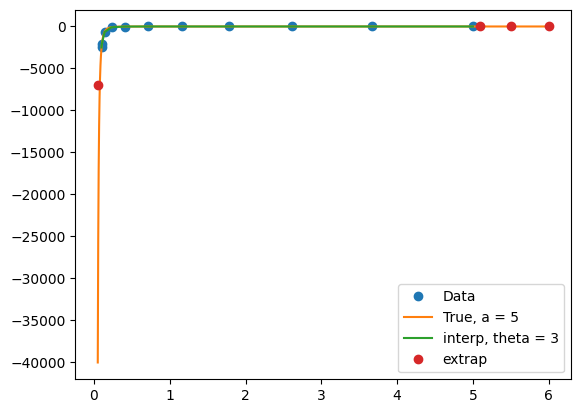

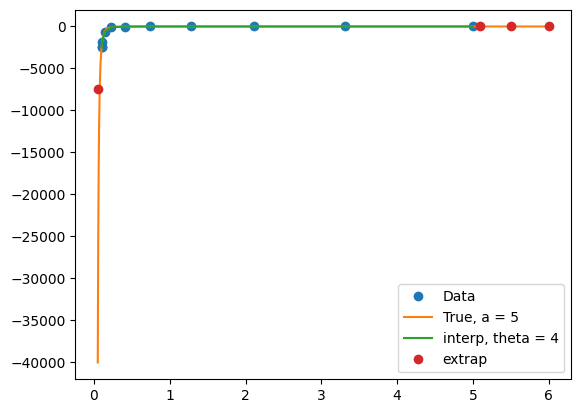

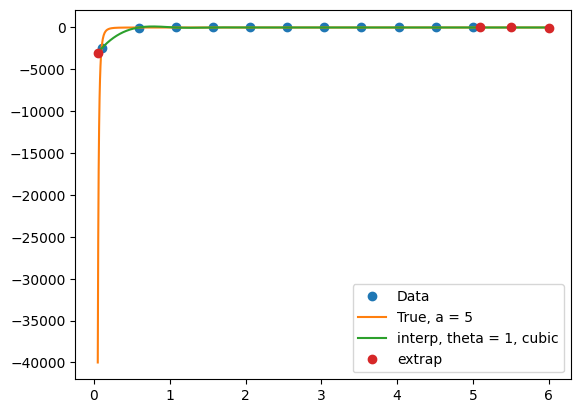

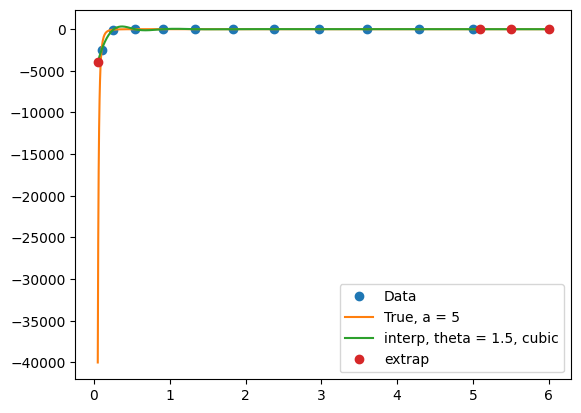

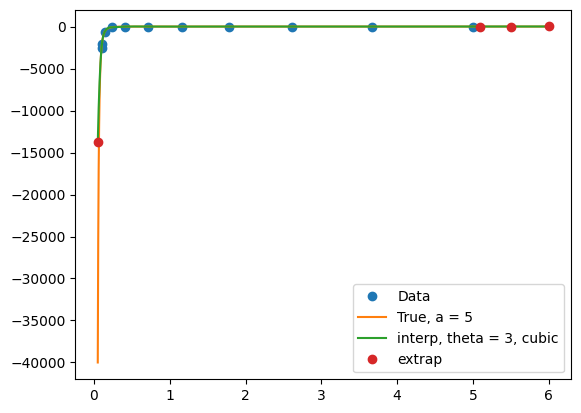

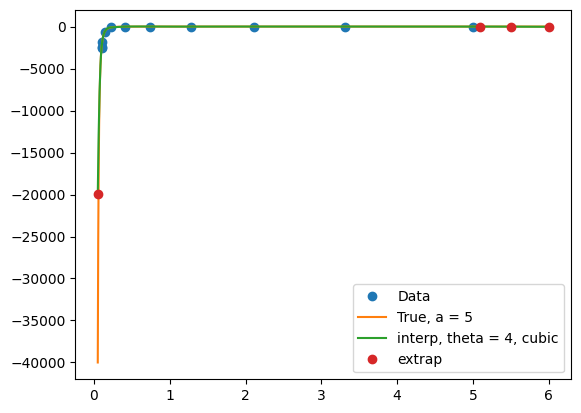

1232124.9395213632
0
1470363.9333151404
0
3104993.834704622
0
3327076.289528303
0
0.8628643093301778
0
1773202.8653747228
0
6160934.690863343
0
8924634.72465645
0


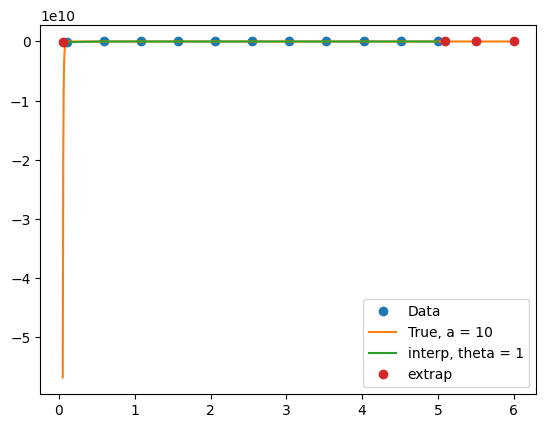

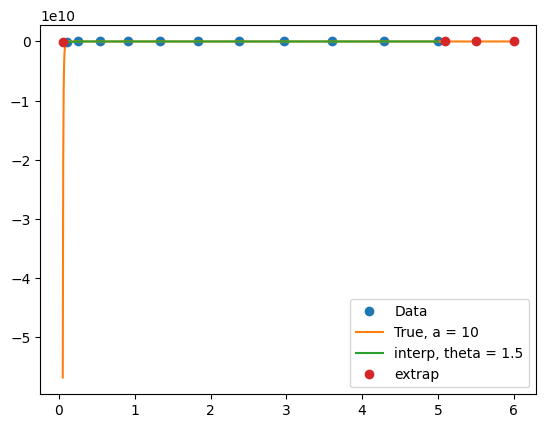

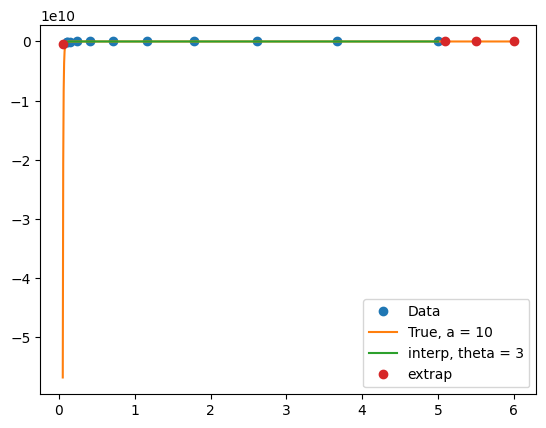

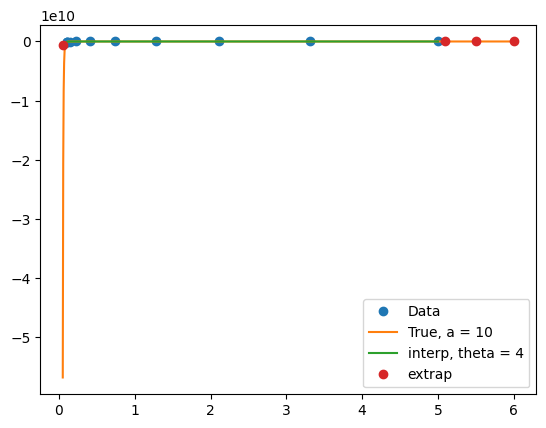

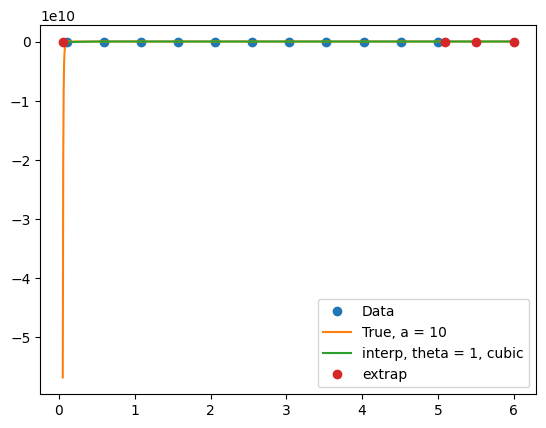

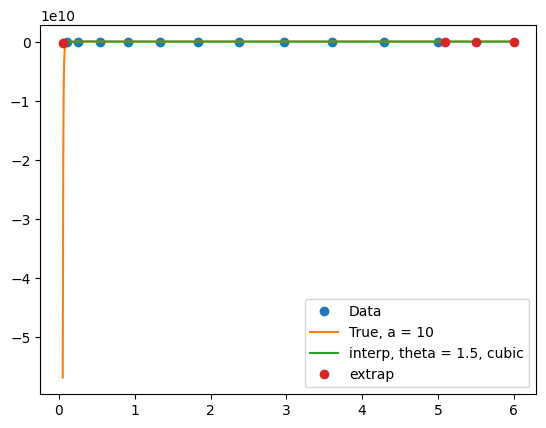

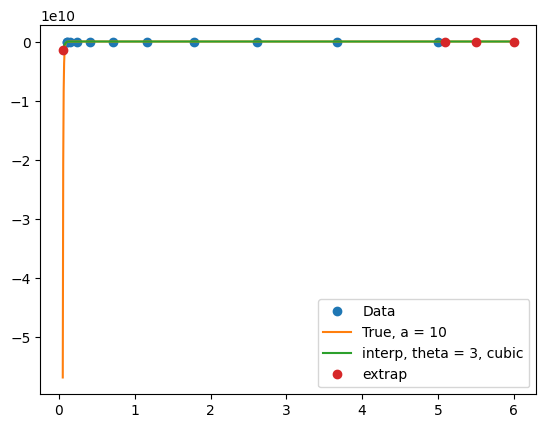

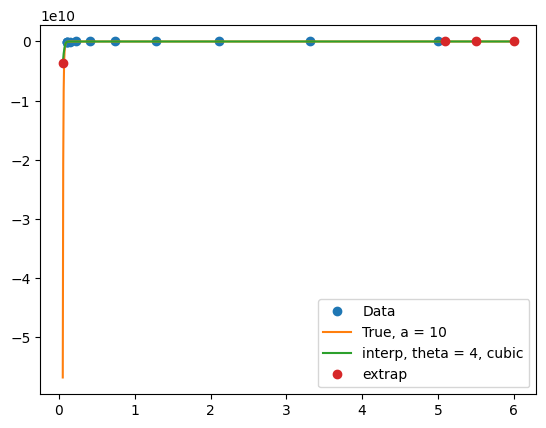

54760847943.26655
0
65721043860.17915
0
227074712020.9928
0
267915830124.13345
0
0.8628643093301778
0
79747319610.70592
0
653940034477.4005
0
1647970487687.7458
0


In [754]:
for a in a_values:
    cubic_extrap_h=interpolate.interp1d(expanding_grid_1[:,0], h(expanding_grid_1,a)[:,0], kind='cubic', fill_value='extrapolate')
    cubic_extrap_h_2=interpolate.interp1d(expanding_grid_2[:,0], h(expanding_grid_2,a)[:,0], kind='cubic', fill_value='extrapolate')
    cubic_extrap_h_3=interpolate.interp1d(expanding_grid_3[:,0], h(expanding_grid_3, a)[:,0], kind='cubic', fill_value='extrapolate')
    cubic_extrap_h_4=interpolate.interp1d(expanding_grid_4[:,0], h(expanding_grid_4, a)[:,0], kind='cubic', fill_value='extrapolate')

    extrap_h=interpolate.interp1d(expanding_grid_1[:,0], h(expanding_grid_1,a)[:,0], kind='linear', fill_value='extrapolate')
    extrap_h_2=interpolate.interp1d(expanding_grid_2[:,0], h(expanding_grid_2,a)[:,0], kind='linear', fill_value='extrapolate')
    extrap_h_3=interpolate.interp1d(expanding_grid_3[:,0], h(expanding_grid_3, a)[:,0], kind='linear', fill_value='extrapolate')
    extrap_h_4=interpolate.interp1d(expanding_grid_4[:,0], h(expanding_grid_4, a)[:,0], kind='linear', fill_value='extrapolate')

    h_interp=extrap_h(expanding_grid_1)
    h_interp_2=extrap_h_2(expanding_grid_2)
    h_interp_3=extrap_h_3(expanding_grid_3)
    h_interp_4=extrap_h_4(expanding_grid_4)

    extrapolated_h=extrap_h(extrapolated_values)
    extrapolated_h_2=extrap_h_2(extrapolated_values)
    extrapolated_h_3=extrap_h_3(extrapolated_values)
    extrapolated_h_4=extrap_h_4(extrapolated_values)

    cubic_h_interp=cubic_extrap_h(larger_grid)
    cubic_h_interp_2=cubic_extrap_h_2(larger_grid)
    cubic_h_interp_3=cubic_extrap_h_3(larger_grid)
    cubic_h_interp_4=cubic_extrap_h_4(larger_grid)

    cubic_extrapolated_h=cubic_extrap_h(extrapolated_values)
    cubic_extrapolated_h_2=cubic_extrap_h_2(extrapolated_values)
    cubic_extrapolated_h_3=cubic_extrap_h_3(extrapolated_values)
    cubic_extrapolated_h_4=cubic_extrap_h_4(extrapolated_values)

    plt.plot(expanding_grid_1[:,0], h(expanding_grid_1,a)[:,0], 'o', label='Data')
    plt.plot(larger_grid, h(larger_grid, a), label = f'True, a = {a}')
    plt.plot(expanding_grid_1, h_interp, label = 'interp, theta = 1')
    plt.plot(extrapolated_values, extrapolated_h, 'o', label = 'extrap')
    plt.legend()  
    plt.show()

    plt.plot(expanding_grid_2[:,0], h(expanding_grid_2, a)[:,0], 'o', label='Data')
    plt.plot(larger_grid, h(larger_grid, a), label = f'True, a = {a}')
    plt.plot(expanding_grid_2, h_interp_2, label = 'interp, theta = 1.5')
    plt.plot(extrapolated_values, extrapolated_h_2, 'o', label = 'extrap')
    plt.legend()  
    plt.show()

    plt.plot(expanding_grid_3[:,0], h(expanding_grid_3,a)[:,0], 'o', label='Data')
    plt.plot(larger_grid, h(larger_grid, a), label = f'True, a = {a}')
    plt.plot(expanding_grid_3, h_interp_3, label = 'interp, theta = 3')
    plt.plot(extrapolated_values, extrapolated_h_3, 'o', label = 'extrap')
    plt.legend()  
    plt.show()

    plt.plot(expanding_grid_4[:,0], h(expanding_grid_4,a)[:,0], 'o', label='Data')
    plt.plot(larger_grid, h(larger_grid, a), label = f'True, a = {a}')
    plt.plot(expanding_grid_4, h_interp_4, label = 'interp, theta = 4')
    plt.plot(extrapolated_values, extrapolated_h_4, 'o', label = 'extrap')
    plt.legend()  
    plt.show()

    plt.plot(expanding_grid_1[:,0], h(expanding_grid_1,a)[:,0], 'o', label='Data')
    plt.plot(larger_grid, h(larger_grid,a), label = f'True, a = {a}')
    plt.plot(larger_grid, cubic_h_interp, label = 'interp, theta = 1, cubic')
    plt.plot(extrapolated_values, cubic_extrapolated_h, 'o', label = 'extrap')
    plt.legend()
    plt.show()

    plt.plot(expanding_grid_2[:,0], h(expanding_grid_2,a)[:,0], 'o', label='Data')
    plt.plot(larger_grid, h(larger_grid,a), label = f'True, a = {a}')
    plt.plot(larger_grid, cubic_h_interp_2, label = 'interp, theta = 1.5, cubic')
    plt.plot(extrapolated_values, cubic_extrapolated_h_2, 'o', label = 'extrap')
    plt.legend()
    plt.show()

    plt.plot(expanding_grid_3[:,0], h(expanding_grid_3,a)[:,0], 'o', label='Data')
    plt.plot(larger_grid, h(larger_grid,a), label = f'True, a = {a}')
    plt.plot(larger_grid, cubic_h_interp_3, label = 'interp, theta = 3, cubic')
    plt.plot(extrapolated_values, cubic_extrapolated_h_3, 'o', label = 'extrap')
    plt.legend()
    plt.show()

    plt.plot(expanding_grid_4[:,0], h(expanding_grid_4,a)[:,0], 'o', label='Data')
    plt.plot(larger_grid, h(larger_grid,a), label = f'True, a = {a}')
    plt.plot(larger_grid, cubic_h_interp_4, label = 'interp, theta = 4, cubic')
    plt.plot(extrapolated_values, cubic_extrapolated_h_4, 'o', label = 'extrap')
    plt.legend()
    plt.show()

    error_1 = np.zeros(shape=(4,1))
    error_1[0] = np.abs((g(0.05) - extrap_h(0.05))) / g(0.05)
    error_1[1] = np.abs((g(5.1) - extrap_h(5.1)))/ g(5.1)
    error_1[2] = np.abs((g(5.5) - extrap_h(5.5))) / g(5.5)
    error_1[3] = np.abs((g(6) - extrap_h(6))) / g(6)
    print(np.max(np.abs(error_1))*100)
    print(np.argmax(np.abs(error_1)))

    error_2 = np.zeros(shape=(4,1))
    error_2[0] = np.abs((g(0.05) - extrap_h_2(0.05))) / g(0.05)
    error_2[1] = np.abs((g(5.1) - extrap_h_2(5.1)))/ g(5.1)
    error_2[2] = np.abs((g(5.5) - extrap_h_2(5.5))) / g(5.5)
    error_2[3] = np.abs((g(6) - extrap_h_2(6))) / g(6)
    print(np.max(np.abs(error_2))*100)
    print(np.argmax(np.abs(error_2)))

    error_3 = np.zeros(shape=(4,1))
    error_3[0] = np.abs((g(0.05) - extrap_h_3(0.05))) / g(0.05)
    error_3[1] = np.abs((g(5.1) - extrap_h_3(5.1)))/ g(5.1)
    error_3[2] = np.abs((g(5.5) - extrap_h_3(5.5))) / g(5.5)
    error_3[3] = np.abs((g(6) - extrap_h_3(6))) / g(6)
    print(np.max(np.abs(error_3))*100)
    print(np.argmax(np.abs(error_3)))

    error_4= np.zeros(shape=(4,1))
    error_4[0] = np.abs((g(0.05) - extrap_h_4(0.05))) / g(0.05)
    error_4[1] = np.abs((g(5.1) - extrap_h_4(5.1)))/ g(5.1)
    error_4[2] = np.abs((g(5.5) - extrap_h_4(5.5))) / g(5.5)
    error_4[3] = np.abs((g(6) - extrap_h_4(6))) / g(6)
    print(np.max(np.abs(error_4))*100)
    print(np.argmax(np.abs(error_4)))

    error_cubic_1 = np.zeros(shape=(4,1))
    error_cubic_1[0] = np.abs((g(0.05) - cubic_extrap_h(0.05))) / g(0.05)
    error_cubic_1[1] = np.abs((g(5.1) - cubic_extrap_h(5.1)))/ g(5.1)
    error_cubic_1[2] = np.abs((g(5.5) - cubic_extrap_h(5.5))) / g(5.5)
    error_cubic_1[3] = np.abs((g(6) - cubic_extrap_h(6))) / g(6)
    print(np.max(np.abs(error))*100)
    print(np.argmax(np.abs(error_cubic_1)))

    cubic_error_2 = np.zeros(shape=(4,1))
    cubic_error_2[0] = np.abs((g(0.05) - cubic_extrap_h_2(0.05))) / g(0.05)
    cubic_error_2[1] = np.abs((g(5.1) - cubic_extrap_h_2(5.1)))/ g(5.1)
    cubic_error_2[2] = np.abs((g(5.5) - cubic_extrap_h_2(5.5))) / g(5.5)
    cubic_error_2[3] = np.abs((g(6) - cubic_extrap_h_2(6))) / g(6)
    print(np.max(np.abs(cubic_error_2))*100)
    print(np.argmax(np.abs(cubic_error_2)))

    cubic_error_3 = np.zeros(shape=(4,1))
    cubic_error_3[0] = np.abs((g(0.05) - cubic_extrap_h_3(0.05))) / g(0.05)
    cubic_error_3[1] = np.abs((g(5.1) - cubic_extrap_h_3(5.1)))/ g(5.1)
    cubic_error_3[2] = np.abs((g(5.5) - cubic_extrap_h_3(5.5))) / g(5.5)
    cubic_error_3[3] = np.abs((g(6) - cubic_extrap_h_3(6))) / g(6)
    print(np.max(np.abs(cubic_error_3))*100)
    print(np.argmax(np.abs(cubic_error_3)))

    cubic_error_4 = np.zeros(shape=(4,1))
    cubic_error_4[0] = np.abs((g(0.05) - cubic_extrap_h_4(0.05))) / g(0.05)
    cubic_error_4[1] = np.abs((g(5.1) - cubic_extrap_h_4(5.1)))/ g(5.1)
    cubic_error_4[2] = np.abs((g(5.5) - cubic_extrap_h_4(5.5))) / g(5.5)
    cubic_error_4[3] = np.abs((g(6) - cubic_extrap_h_4(6))) / g(6)
    print(np.max(np.abs(cubic_error_4))*100)
    print(np.argmax(np.abs(cubic_error_4)))


    
    